### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [344]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [345]:
data = pd.read_csv('data/coupons.csv')

In [346]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [347]:
#list columnw with nan
li_cols_with_nan=data.columns[data.isna().any()].tolist()
li_cols_with_nan
#percentage nan 
percent_nan = data.isnull().sum() * 100 / data.shape[0]
percent_nan

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

3. Decide what to do about your missing data -- drop, replace, other...

#variabes with more than 5% Nans will be ignored. Here it is variable 'car' which will be ignored.

4. What proportion of the total observations chose to accept the coupon? 



#The following code is tested with a seaborn version '0.12.0".
#There is a warning during the execution, giving the message 
#'Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning'.
#This occurs when a pairgrid is going to be plot  the diagonal of which is comprised of the pdf functions of the 
#involved variables. When there is no variance and the kernel density estimate gives this warning. Perhaps other types of plots should be in the diagonal instead of pdf. However this warning gives the opportunity to recall once again that the given dataset has zero  variance.

In [348]:
data["Y"].value_counts()[1]/data["Y"].value_counts().sum()

0.5684326710816777

In [349]:
#round(100*data["Y"].value_counts()[1]/data["Y"].value_counts().sum(),2)

5. Use a bar plot to visualize the `coupon` column.

#creation of a folder for all the plots


In [350]:
#create a folder name Figures for all the plots
import os
if not os.path.exists('Figures'):
   os.makedirs('Figures')

6. Use a histogram to visualize the temperature column.

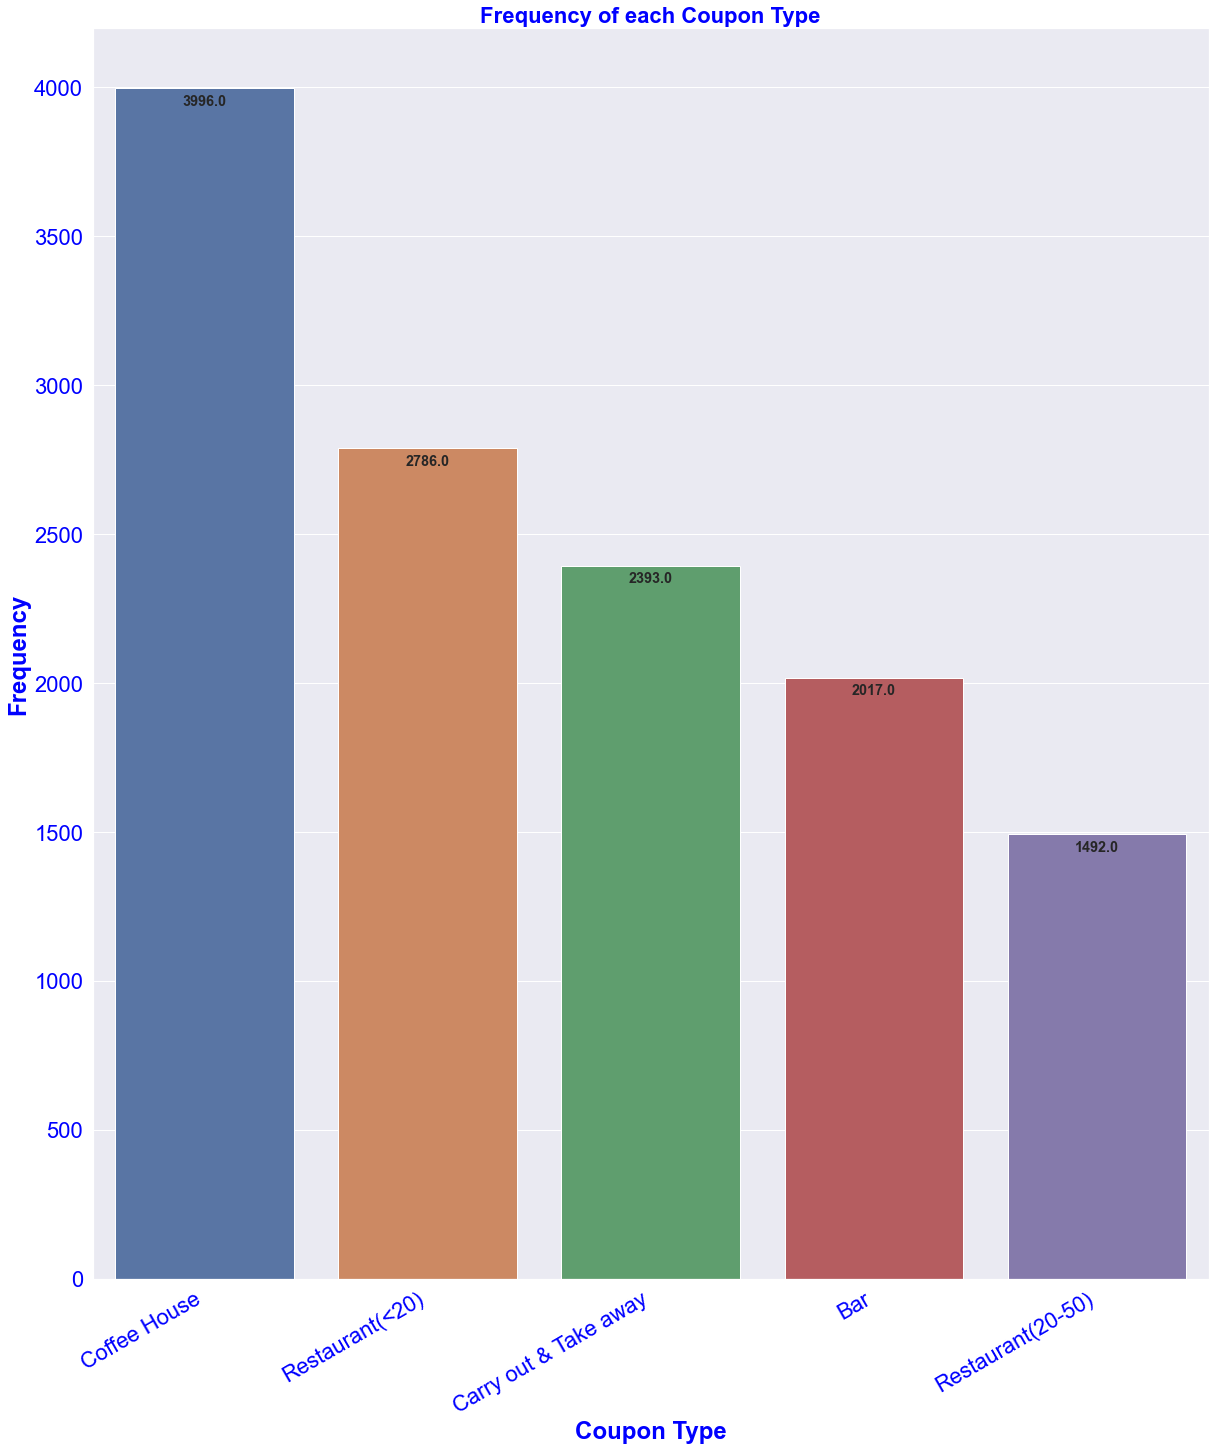

In [351]:
a=data["coupon"].value_counts()

plt.figure(figsize=(20,23))
fig=sns.barplot(x= a.index.to_list(),y=a.values)


for g in fig.patches:
    fig.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   #xytext = (0, 9),
                   xytext = (0, -13),
                   size='large',weight='bold',
                   textcoords = 'offset points')

fig.set_title('Frequency of each Coupon Type',fontsize=22,color="blue",weight='bold')
plt.xticks(rotation=30,horizontalalignment='right',fontsize=22,color="blue")
plt.yticks(fontsize=22,color="blue")
plt.xlabel("Coupon Type", size = 24,color="blue",weight='bold')
plt.ylabel("Frequency", size = 24,color="blue",weight='bold',)
plt.savefig("Figures/fig_bar_coupons.png")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [352]:
df_coupons_b=data[data["coupon"]=="Bar"]
#df_coupons_b

2. What proportion of bar coupons were accepted?


In [353]:
#we define the proportion of the accepted bar coupons= the number of the accepted bar coupons / the total nuber of bar coupons
#df_coupons_b["Y"]==1).value_counts()[True]/df_coupons_b.shape[0]
df_coupons_b.query("Y==1").shape[0]/df_coupons_b.shape[0]

0.41001487357461575

In [354]:
#round((df_coupons_b["Y"]==1).value_counts()[True]*100/df_coupons_b.shape[0],2)

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [355]:
#

In [356]:
#those who went to a bar 3 or fewer times= those who went 'never'+'less1'+'1-3'
#acceptance_rate those who went to a bar 3 or fewer times denoted by a_1
#a1=those who went to bar at most three  times and accepted the coupons/all those who went to bar at most three (accepted and rejeted the coupon)

#df_coupons_b["Bar"].unique()
#array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)


#dataframe  for those who went to Bar 'never' the last month
df_1=df_coupons_b.query("Bar=='never'")

#dataframe  for those who went to Bar  'less1' last  month
df_2=df_coupons_b.query("Bar=='less1'")

#dataframe  for those who went to Bar between 1 and 3 last  month
df_3=df_coupons_b.query("Bar=='1~3'")

#acceptance rate
#df_1[df_1["Y"]==1].shape[0]
#df_1[df_1["Y"]==0].shape[0]

#a2=those who went to bar at most three times last month and accepted the coupons
a2=(df_1[df_1["Y"]==1].shape[0]+df_2[df_2["Y"]==1].shape[0]+df_3[df_3["Y"]==1].shape[0])


#a3=the entire population who went to bar at most three times last  month
a3=df_1.shape[0]+df_2.shape[0]+df_3.shape[0]

a1=a2/a3
a1

0.37061769616026713

In [357]:
#those who went more than 3 times to a bar are those who went 4 to 8 times plus those who went greater than 8
#there are nans when we search the unique types of coupons. these nans will be ignored
#b1=he acceptance rate of those who went more than three times to a bar 
#b1=those who went to bar more than  three  times and accepted the coupons/all those who went to bar more than three (accepted and rejeted the coupon)

#dataframe  for those who went to Bar more than eight times the last month
df_4=df_coupons_b.query("Bar=='gt8'")

#dataframe  for those who went to Bar between 4 and 8 tiùes last mo,th
df_5=df_coupons_b.query("Bar=='4~8'")



#b2=those who went to bar more than three times last month and accepted the coupons
b2=(df_3[df_3["Y"]==1].shape[0]+df_4[df_4["Y"]==1].shape[0])


#b3=the entire population who went to bar more than three times last  month
b3=df_3.shape[0]+df_4.shape[0]
b3

b1=b2/b3
b1


0.6569506726457399

In [358]:
m1="the coupon acceptance rate of those who went to bar more than three times last month is greater than the acceptance rate of those who went at most three times last month"
m2="the coupon acceptance rate of those who went to bar more than three times last month is smaller than the acceptance rate of those who went at most three times last month"
m3="the coupon acceptance rate of those who went to bar more than three times last month equals the acceptance rate of those who went at most three times last month"
if b1>a1:
    print(m1)
elif b1<a1:
    print(m2)
else:
    print(m3)

the coupon acceptance rate of those who went to bar more than three times last month is greater than the acceptance rate of those who went at most three times last month


In [359]:
#

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [360]:
#c1=the acceptance rate of those who went more than once to a bar and are over 25
#c1=(those who went 1~3 to a bar, accepted the coupon and are over 25 +
#those who went 4~8 to a bar, accepted the coupon and are over 25 +
#those who went gt8 to a bar, accepted the coupon and are over 25 ) /
#all those who went to a bar more than once

#dataframe of those who are over 25 and went to bar from 1 to 3
df_6=df_3.query("age >'25'")

#dataframe of those who are over 25 and went to bar from more than 8
df_7=df_4.query("age >'25'")

#dataframe of those who are over 25 and went to bar from 4 to 8
df_8=df_5.query("age >'25'")

df_6_1=df_6.query("Y==1")
df_7_1=df_7.query("Y==1")
df_8_1=df_8.query("Y==1")

c2=df_6_1.shape[0]+df_7_1.shape[0]+df_8_1.shape[0]

#c3=all those who went to bar more than once (month)
c3=df_3.shape[0]+df_4.shape[0]+df_5.shape[0]

c1=c2/c3


# we consider that term ''all others'' means all ages ≤ 25
#d1=the acceptance rate of those who went more than once to a bar and are ≤ 25
#d1=(those who went 1~3 to a bar, accepted the coupon and are ≤ 25 +
#those who went 4~8 to a bar, accepted the coupon and are ≤ 25 +
#those who went gt8 to a bar, accepted the coupon and are ≤ 25 ) /
#all those who went to a bar more than once

#dataframe of those who are at most 25 and went to bar from 1 to 3
df_9=df_3.query("age <='25'")

#dataframe of those who are at most 25 and went to bar from more than 8
df_10=df_4.query("age <='25'")

#dataframe of those who are at most 25 and went to bar from 4 to 8
df_11=df_5.query("age <='25'")


df_9_1=df_9.query("Y==1")
df_10_1=df_10.query("Y==1")
df_11_1=df_11.query("Y==1")

d2=df_9_1.shape[0]+df_10_1.shape[0]+df_11_1.shape[0]

d1=d2/c3

m1="acceptance rate of those who went to a bar more than 1 and are over 25 is greater than the acceptance rate \
of those who went to a bar more than 1 and are at most 25"

m2="acceptance rate of those who went to a bar more than 1 and are over 25 is inferior to the acceptance rate \
of those who went to a bar more than 1 and are at most 25"

m3="acceptance rate of those who went to a bar more than 1 and are over 25 is equal to the acceptance rate \
of those who went to a bar more than 1 and are at most 25"

if c1 >d1:
    print(m1)
elif c1<d1:
        print(m2)
else:
    print(m3)



acceptance rate of those who went to a bar more than 1 and are over 25 is greater than the acceptance rate of those who went to a bar more than 1 and are at most 25


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [361]:

#f1=the acceptance rate of those who went more than once to a bar and had passengers ≠kids and 
#occupations ≠ farming, fishing and forestry
#f1=(those who went 1~3 to a bar, accepted the coupon and had passengers ≠kids and 
#occupations ≠ farming, fishing and forestry +
#those who went 4~8 to a bar, accepted the coupon and and had passengers ≠kids and 
#occupations ≠ farming, fishing and forestry +
#those who went gt8 to a bar, accepted the coupon and and had passengers ≠kids and 
#occupations ≠ farming, fishing and forestry ) /
#all those who went to a bar more than once

#dataframe of those  went to bar from 1 to 3
#and passengers are not kids and occupation is not Farming Fishing & Forestry
df_12=df_3.query(("passanger!='Kid(s)'") and ("occupation!='Farming Fishing & Forestry'"))


#dataframe of those went to bar from more than 8
#and passengers are not kids and occupation is not Farming Fishing & Forestry
df_13=df_4.query(("passanger!='Kid(s)'") and ("occupation!='Farming Fishing & Forestry'"))


#dataframe of those who a went to bar from 4 to 8
#and passengers are not kids and occupation is not Farming Fishing & Forestry
df_14=df_5.query(("passanger!='Kid(s)'") and ("occupation!='Farming Fishing & Forestry'"))



df_12_1=df_12.query("Y==1")
df_13_1=df_13.query("Y==1")
df_14_1=df_14.query("Y==1")

f2=df_12_1.shape[0]+df_13_1.shape[0]+df_14_1.shape[0]

f1=f2/c3


#the problem asks to compare f1 but does not precise to which ?  
#so  it is supposed that f1 should be compared to the acceptance rate of those who go to bars more than once
#and passengers where kids and occupations were farming, fishing and forestry

#dataframe of those  went to bar from 1 to 3
#and passengers are  kids and occupation is  Farming Fishing & Forestry
df_15=df_3.query(("passanger=='Kid(s)'") and ("occupation=='Farming Fishing & Forestry'"))



#dataframe of those went to bar from more than 8
#and passengers are ids and occupation is  Farming Fishing & Forestry
df_16=df_4.query(("passanger=='Kid(s)'") and ("occupation=='Farming Fishing & Forestry'"))


#dataframe of those who a went to bar from 4 to 8
#and passengers are  kids and occupation is  Farming Fishing & Forestry
df_17=df_5.query(("passanger=='Kid(s)'") and ("occupation=='Farming Fishing & Forestry'"))

#as df_15, df_16, df_17 are empty dataframes there isn't 


f1






0.6879194630872483

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [362]:
#dataframe of those  went to bar from 1 to 3
#and passengers are not  kids and are not widowed
df_18=df_3.query(("passanger!='Kid(s)'") and ("maritalStatus!='Widowed'"))



#dataframe of those went to bar  more than 8 and passengers are not  kids and are not widowed

df_19=df_4.query(("passanger!='Kid(s)'") and ("maritalStatus!='Widowed'"))

#dataframe of those who a went to bar from 4 to 8 nd passengers are not  kids and are not widowed

df_20=df_5.query(("passanger!='Kid(s)'") and ("maritalStatus!='Widowed'"))



df_18_1=df_18.query("Y==1")
df_19_1=df_19.query("Y==1")
df_20_1=df_20.query("Y==1")

g2=df_18_1.shape[0]+df_19_1.shape[0]+df_20_1.shape[0]

#g1=the acceptance rate of those who go to bars more than once a month, had passengers that were not a kid, and were not widowed OR

#c3=all those who went to bar more than once (month), calculated previously

g1=g2/c3
g1



0.6879194630872483

In [363]:

#dataframe of those  went to bar from 1 to 3 and are under the age of 30
#and passengers are not  kids and are not widowed
df_21=df_3.query("age<'30'")



#dataframe of those went to bar  more than 8 and are under the age of 30

df_22=df_4.query("age<'30'")

#dataframe of those who a went to bar from 4 to 8 nd passengers are under the ag of 30

df_23=df_5.query("age<'30'")



df_21_1=df_21.query("Y==1")
df_22_1=df_22.query("Y==1")
df_23_1=df_23.query("Y==1")

h2=df_21_1.shape[0]+df_22_1.shape[0]+df_23_1.shape[0]

#h1=the acceptance rate of those who go to bars more than once a month, and are under 30 years old

#c3=all those who went to bar more than once (month), calculated previously

h1=h2/c3
h1


0.4110738255033557

In [364]:


#those who go to cheap restaurants more than 4 times a month are those who go to cheap restaurants
#from 4 to 8 times and those who go more than 8
#dateframe with those who go to cheap restaurants from 4 to 8 to 
df1=df_coupons_b.query("RestaurantLessThan20=='4~8'")

#dateframe with those who go to cheap restaurants more than 8 times per month

df2=df_coupons_b.query("RestaurantLessThan20=='gt8'")
df2.shape

#nb of rows df3= nb of rows df1+nb of rows df2
#nb of columns df3= nb of columns df1=nb of columns df2

df3=pd.concat([df1, df_2]) 

values=['$12500 - $24999','$25000 - $37499','$37500 - $49999']

df4=df3[df3["income"].isin(values)]


#j1=the acceptance rate of those who go to cheap restaurants more than 4 times per month and have an income les 50K
j1=df4.query("Y==1").shape[0]/df4.shape[0]
j1










0.44761904761904764

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [365]:
#function returnng the  key given a value within a dictionary

def fct_key_dict(di,value):
    
   for i, j in di.items():
    #print("i,j",i,j)
    #print(value == j)
    if value == j:
        return i
    
#function returnng ta list of keys given a list of value within a dictionary
def fct_li_key_dict(dic,li_values):
    li_rep=[]
   
    for i in li_values:
        #print()
        #print(i)
        li_rep.append(fct_key_dict(di=dic,value=i))
        
    return li_rep

#r=dictionary the values of which are the previously computed acceptance rates and the values are the
#acceptance rates
r={'a1':0.37061769616026713,'b1':0.6569506726457399,'c1':0.4966442953020134,
   'd1':0.1912751677852349, 'f1':0.6879194630872483,
   'g1':0.6879194630872483,'h1':0.4110738255033557,'j1': 0.44761904761904764}

#ist of acceptance rates
rates=list(r.values())

#sorted list of acceptance rated with an increasing order
rates.sort()

#we counts if there  at least two keys with the same acceptance rate, there are (value 0.6879194630872483)
from collections import Counter
counts = dict(Counter(rates))
counts
duplicates = {key:value for key, value in counts.items() if value > 1}


#list of keys correspinding to the sorted list of the acceptance rate
#a key may appear multiple times in case  duplicates is not empty.
#we remove duplicates from lis_keys

lis_keys=fct_li_key_dict(dic=r,li_values=rates)

#duplicate removal
lis_keys=list(dict.fromkeys(lis_keys))



#distionary, key=variable correspining to a previously computed acceptance rate, value= the label explaing the signification
#of the acceptance rate
r1={'a1':'accept. rate of pop. went to a bar  at most 3 times',
    'b1':'accept. rate of pop. went to a bar more than 3 times',
    'c1':'accept. rate of pop. went to a bar more than once and are over 25 years old',
    'd1':'accept. rate of pop. went to a bar  more than once and are less than 25 years old',
    'f1':'accept. rate of pop. went to a bar  more than once and had passengers kids and their occupations ≠ farming, fishing and forestryd',
    'g1':'accept. rate of pop. went to a bar more than once  had passengers that were not a kid, and were not widowed',
    'h1': 'accept. rate of pop. went to a bar more than once a month and are under the age of 30',
   'j1':'accept. rate of pop.  going to cheap restaurants more than 4 times a month and income is less than 50K'
   }
#r1



        





In [366]:
#we examine duplicates
#we see that value 0.6879194630872483 appears in two keys
duplicates

{0.6879194630872483: 2}

In [367]:
print('Based only on the previousy made observations the following list represents in an ascending order acceptance rate of the previously considered populations:')

#the list with the labels of each accepted rate located in the sorted list rates
#this  list  follows the same sort as list rates, thus the i=1 elements has an acceptance rate < than the i element
#it shows the observations basd only in the observations provided within the previous problems
li_labels=[r1[i] for i in lis_keys]
li_labels


Based only on the previousy made observations the following list represents in an ascending order acceptance rate of the previously considered populations:


['accept. rate of pop. went to a bar  more than once and are less than 25 years old',
 'accept. rate of pop. went to a bar  at most 3 times',
 'accept. rate of pop. went to a bar more than once a month and are under the age of 30',
 'accept. rate of pop.  going to cheap restaurants more than 4 times a month and income is less than 50K',
 'accept. rate of pop. went to a bar more than once and are over 25 years old',
 'accept. rate of pop. went to a bar more than 3 times',
 'accept. rate of pop. went to a bar  more than once and had passengers kids and their occupations ≠ farming, fishing and forestryd']

In [368]:
#we search the 2 keys corresponding to this value
def fct_all_keys_given_val(di, val):
  return list(i for i, j in di.items() if j == val)

li_eqs=fct_all_keys_given_val(di=r, val=0.6879194630872483)

#we explain that r1['f1'] is = to r1[g1]
print("Additional hypothesis:", r1[li_eqs[0]],'has same aceptance rate as',r1[li_eqs[1]])

Additional hypothesis: accept. rate of pop. went to a bar  more than once and had passengers kids and their occupations ≠ farming, fishing and forestryd has same aceptance rate as accept. rate of pop. went to a bar more than once  had passengers that were not a kid, and were not widowed


In [369]:
lis_keys

['d1', 'a1', 'h1', 'j1', 'c1', 'b1', 'f1']

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [370]:
#numerical columns
data_num=data.select_dtypes('number')
li_cols_num=data_num.columns.tolist()

# columns object type
data_obj=data.select_dtypes('object')

li_cols_obj=data_obj.columns.tolist()

AttributeError: 'Line2D' object has no property 'bw_adjust'

<Figure size 432x288 with 0 Axes>

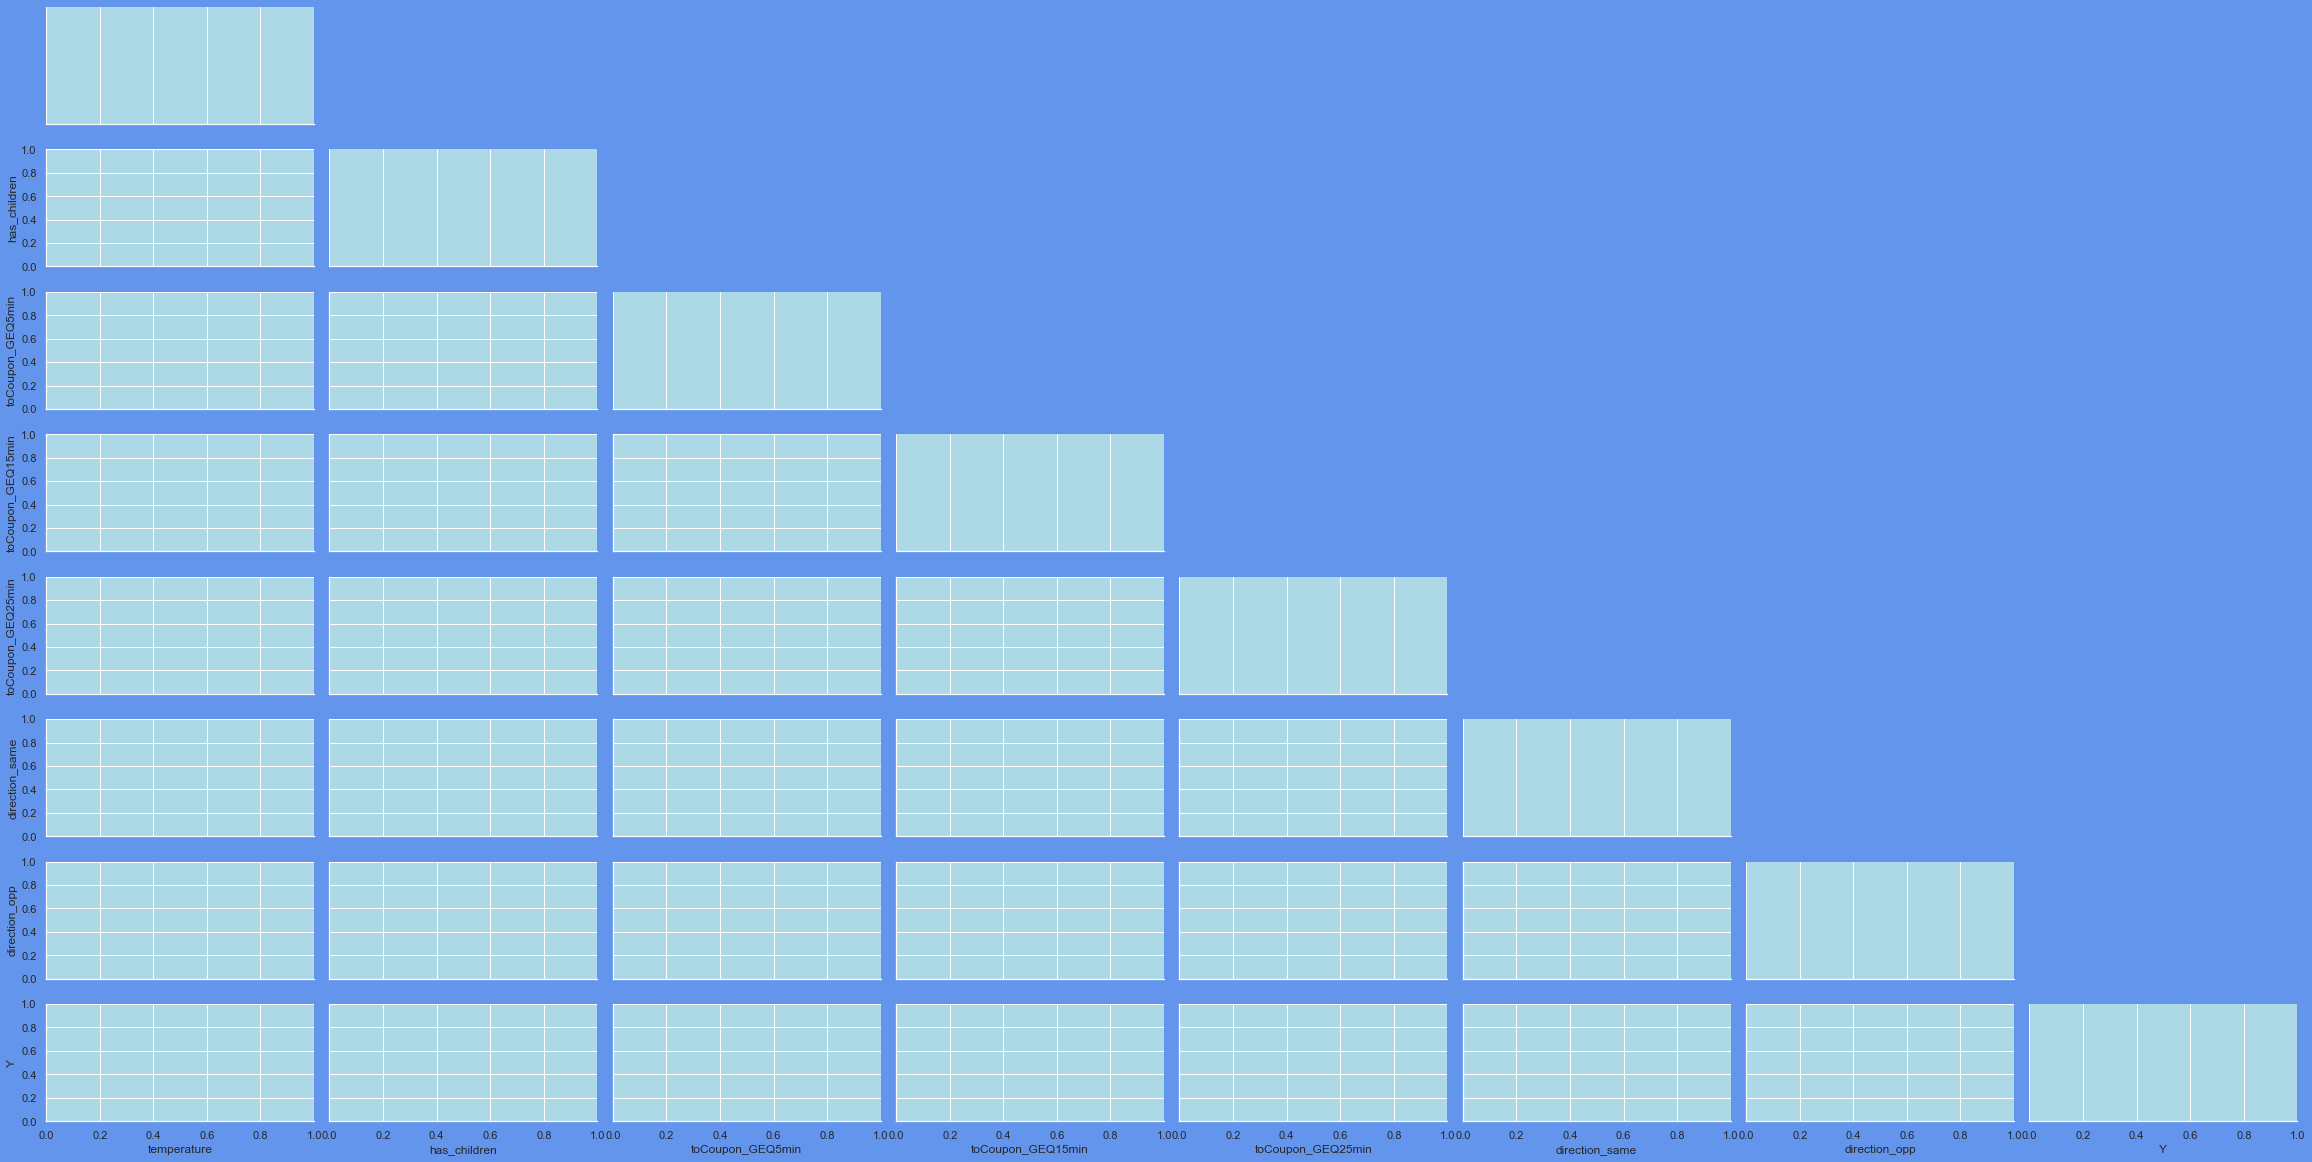

In [371]:
#****Pairgrid
sns.set(style="darkgrid")

res=sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'cornflowerblue'})

fig=plt.figure()
#fig=plt.figure(figsize=(22,167))
plt.rcParams["axes.labelsize"] = 12


	
#sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'cornflowerblue'})
g = sns.PairGrid(data[li_cols_num],diag_sharey=False,height=2, aspect=2,corner=True)
g.map_diag(sns.kdeplot,lw=3,bw_adjust=.25)
g.map_offdiag(sns.scatterplot,s=30)
g.add_legend()
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
#plt.xticks(rotation=70)

g.fig.suptitle('Pairwise relationship  on client and coupon numerical  features.',fontsize=27,weight="bold",c="darkblue")
plt.savefig("Figures/fig_pairgrid_density_diagon_num_variables_coupons.png")


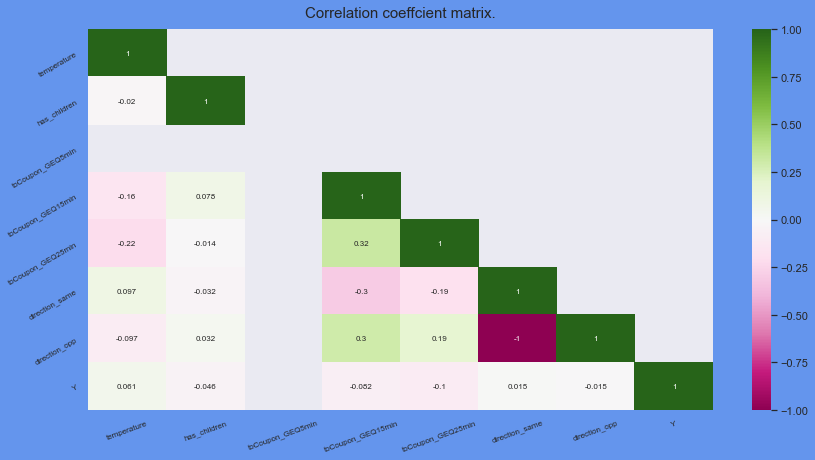

In [372]:
#****correlation heatmap for numerical variables

plt.figure(figsize=(14,7))
#plt.figure(figsize=(20,15))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,n=5, center="light", as_cmap=True)

#Create a mask
mask = np.triu(np.ones_like(data[li_cols_num].corr(), dtype=bool))
np.fill_diagonal(mask, False)

#scale all fonts in your legend and on the axes.
#sns.set(font_scale=1.4)
sns.set(font_scale=1)

heatmap = sns.heatmap(data[li_cols_num].corr(), vmin=-1, vmax=1, annot=True,annot_kws={'fontsize': 8},
cmap="PiYG", mask=mask)
heatmap.set_title('Correlation coeffcient matrix.', fontdict={'fontsize':15}, pad=12)
plt.yticks(rotation=30,fontsize=8)
plt.xticks(rotation=20,fontsize=8)
plt.savefig("Figures/fig_cor_heatmap.png")
plt.close(fig)

In [373]:
#****seaborn pie for coupon types from a series .

coupon_data=data["coupon"].value_counts()
fig=plt.figure(figsize=(10,10))
fig.patch.set_facecolor('lightcyan')
sns.set_theme(font="arial", font_scale=1.5)
data1=coupon_data.values
labels=coupon_data.index.to_list()
colors = sns.color_palette('bright')[0:7]
# Change color of text
plt.rcParams['text.color'] = 'navy'

plt.pie(data1, labels = labels, colors = colors, autopct='%.0f%%')
plt.title(" Coupon Distribution.", fontsize=12,color="blue",weight='bold',bbox={'facecolor':'0.8', 'pad':7})
plt.savefig("Figures/fig_pie_coupons.png")
plt.close(fig)




AttributeError: module 'seaborn' has no attribute 'set_theme'

<Figure size 720x720 with 0 Axes>

In [374]:
#we will examine the percentage of  accepted and rejected coupons regarding all coupons
d_accept_all=data.query("Y==1")['coupon'].shape[0]
d_reject_all=data.query("Y==0")['coupon'].shape[0]


fig=plt.figure(figsize=(10,10))
fig.patch.set_facecolor('lightcyan')
sns.set_theme(font="arial", font_scale=1.5)
colors2 = sns.color_palette('YlOrBr')
# Change color of text
plt.rcParams['text.color'] = 'red'


#autopct='%1.1f%%'
#'%.0f%%'

plt.pie([d_accept_all,d_reject_all],labels=["total acceptance","total rejection"], colors = colors2,autopct='%.0f%%')
plt.title("Total Coupon Acceptance-Rejection .", fontsize=12,color="blue",weight='bold',bbox={'facecolor':'lightskyblue', 'pad':14})
fig.set_facecolor('teal')
plt.savefig("Figures/fig_pie_total_accept_rej.png")
plt.close(fig)

AttributeError: module 'seaborn' has no attribute 'set_theme'

<Figure size 720x720 with 0 Axes>

In [375]:
#we will examine which percentage of each coupon type is accepted among all the accepted coupons
d_a=data.query("Y==1")['coupon'].value_counts()

fig=plt.figure(figsize=(10,10))
fig.patch.set_facecolor('lightcyan')
sns.set_theme(font="arial", font_scale=1)
colors2 = sns.color_palette('dark')
# Change color of text
plt.rcParams['text.color'] = 'dodgerblue'


plt.pie(d_a.values.tolist(),labels=d_a.index.tolist(), colors = colors2,autopct='%.0f%%')
plt.title("Acceptance Frequency Per Coupon Type.", fontsize=12,color="blue",weight='bold',bbox={'facecolor':'lightskyblue', 'pad':14})
fig.set_facecolor('lightcyan')
plt.savefig("Figures/fig_pie_freq_accept_coupons.png")
plt.close(fig)


AttributeError: module 'seaborn' has no attribute 'set_theme'

<Figure size 720x720 with 0 Axes>

In [376]:
#we will examine which percentage of each coupon type is rejected among all the rejected coupons
d_r=data.query("Y==0")['coupon'].value_counts()

fig=plt.figure(figsize=(10,10))
fig.patch.set_facecolor('lightcyan')
sns.set_theme(font="arial", font_scale=1)
colors2 = sns.color_palette('dark')
# Change color of text
plt.rcParams['text.color'] = 'dodgerblue'

plt.pie(d_r.values.tolist(),labels=d_r.index.tolist(), colors = colors2,autopct='%.0f%%')
plt.title("Refusal Frequency Per Coupon Type.", fontsize=12,color="blue",weight='bold',bbox={'facecolor':'lightskyblue', 'pad':14})
#plt.setp( {'font':'arial', 'weight':'bold', 'fontsize':5})
fig.set_facecolor('lightcyan')
plt.savefig("Figures/fig_pie_freq_reject_coupons.png")
plt.close(fig)

AttributeError: module 'seaborn' has no attribute 'set_theme'

<Figure size 720x720 with 0 Axes>

In [377]:
#Analysis of the coupon with the smallest nb of Occurences  (12%)that is  Restaurant(20-50) also called here
#expensive restuarants as they are the ones with the higher prices among the other conisdered restuarants

#df_r_e=df_restaurant_expensive with the info for all  those who received coupons for Restaurant(20-50)
df_r_e=data.query("coupon=='Restaurant(20-50)'")

#series with the number of times expensive resto coupon where accepted and refused
s_1=df_r_e["Y"].value_counts()



#df_r_e_a= df _resto_expensive_accepted  with the  info of those who accepted Restaurant(20-50)' coupons
df_r_e_a=df_r_e.query("Y==1")


#df_r_e_r= df_rest_expensive_rejected with the  info of those who rejected Restaurant(20-50)' coupons, (we will use it later)
df_r_e_r=df_r_e.query("Y==0")




In [378]:
#fct returning a list  with the  frequencies (%)  of  each considered variable of a list of variables
#v_df=dataframe
#v_li_variables[.....,ithe variable to measure its frquence (in %), .....]
def fct_li_series_with_frequencies_inperc_for_li_variables(v_df, v_li_variables):
	#li_rep=[,...., series with the value_counts of the i the variable,....]
	li_rep=[]
	#for each num variable
	for i in v_li_variables:
		#create a series with the  counts of each  of each possible value
		s=(v_df[i].value_counts(normalize=True)*100).round(2)
		li_rep.append(s)
	return li_rep

In [382]:
#we create the list of series with the frequencies (in%) for population who received coupons for expensive Restos, regarding  the numerical variables, 8
li_s_freq_num_vars_all=fct_li_series_with_frequencies_inperc_for_li_variables(v_df=df_r_e, v_li_variables=li_cols_num)

#we create the list of series with the frequencies (in%) for population who accepted coupons for expensive Restos, regarding  the numerical variables, 8
li_s_freq_num_vars_ac=fct_li_series_with_frequencies_inperc_for_li_variables(v_df=df_r_e_a, v_li_variables=li_cols_num)


#we create the list of series  with the frequencies (in%) for population who rejected coupons expensive Restos, for  the numerical variables, 8
#thus for each nuerical variable we wil have  series with the frequency of eaxh possible value that the varibale can take
li_s_freq_num_vars_rej=fct_li_series_with_frequencies_inperc_for_li_variables(v_df=df_r_e_r, v_li_variables=li_cols_num)





#we will ignore variable car as there are too many nans
li_cols_obj_1=li_cols_obj

ind=li_cols_obj_1.index("car")

del li_cols_obj_1[ind]

li_s_freq_obj_type_all=fct_li_series_with_frequencies_inperc_for_li_variables(v_df=df_r_e, v_li_variables=li_cols_obj_1)

li_s_freq_obj_type_ac=fct_li_series_with_frequencies_inperc_for_li_variables(v_df=df_r_e_a, v_li_variables=li_cols_obj_1)


li_s_freq_obj_type_rej=fct_li_series_with_frequencies_inperc_for_li_variables(v_df=df_r_e_r, v_li_variables=li_cols_obj_1)






In [384]:
#fct creating a matrix of subplots (dimension (v_nb_rows,v_nb_cols))  of a list of variables.
#Each subplot plots the barplot of a variable in the list
#v_li_subtitle=list with the title of eah subplot
#v_subtitle=the title of the global  plot
#v_name_fig_png=the name of the file to save the  figure
#v_fig_facecolor,v_axes_facecolor,v_palette,v_color_title,v_color_axis_text,\
#v_color_background,v_color_background_1= variables related tot he colors of the figure
#v_fig_facecolor= color for the background of the entire plot
#v_axes_facecolor= color for the background of each subplot
#v_palette=palette color
#v_color_title=color for title letters
#v_color_axis_text=color for axis text
#v_color_background color for each subplot  title  background
#v_color_background_=color for suptitle background

#REMARK THE  HEIGHT OF EACH BAR REPRESENTS THE FREQUENCY OF THE VARIABLE (%)

def fct_subplots_barplots_li_vars(v_nb_rows,v_nb_cols,v_li_series_val_counts,v_li_subtitle,\
v_subtitle,v_name_fig_png,v_fig_facecolor,v_axes_facecolor,v_palette,v_color_title,v_color_axis_text,\
v_color_background,v_color_background_1):

	res=sns.set(rc={'axes.facecolor':v_axes_facecolor, 'figure.facecolor':v_fig_facecolor})
	
	fig, axes = plt.subplots(v_nb_rows, v_nb_cols,figsize=(40, 35))

	fig.suptitle(v_subtitle,fontsize=30,fontweight="bold",backgroundcolor=v_color_background_1)
	
	
	nb_vars_to_plot=len(v_li_series_val_counts)
	
	v_nb_plots_made=-1
	
	
	
	#for each  row
	for i in range(v_nb_rows):
		
		#for each column
		for j in range(v_nb_cols):
			
			#if we stil need to plot
			if (v_nb_plots_made +1)< nb_vars_to_plot:
				
				
				data2 =list(v_li_series_val_counts[v_nb_plots_made+1].values)
				labels2=list(v_li_series_val_counts[v_nb_plots_made+1].index.to_list())
				
				ax=sns.barplot(ax=axes[i, j],y=data2, x = labels2,errorbar=None, palette=v_palette,orient='v')
				ax.set_title("Variable "+v_li_subtitle[v_nb_plots_made+1], fontsize=27,backgroundcolor=v_color_background,color=v_color_title,weight='bold' )
				
				#ax.set_xlabel (v_li_subtitle[v_nb_plots_made+1], fontsize=30,color=v_color_axis_text,weight='bold')
				ax.set_ylabel ("Percentage %", fontsize=30,color=v_color_axis_text,weight='bold')
				
				for rect in ax.patches:
					ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), fontsize=25,color=v_color_title,weight='bold' )
				
				ax.tick_params(axis='x', colors=v_color_axis_text,labelsize=30)
				ax.tick_params(axis='y', colors=v_color_axis_text,labelsize=30)
				fig.tight_layout()
				plt.subplots_adjust(top=0.95)
				v_nb_plots_made+=1
			else:
				fig.delaxes(ax= axes[v_nb_rows-1,v_nb_cols-1])
			
	plt.savefig(v_name_fig_png)
	plt.close(fig)



In [385]:
#function subplots (bars) of multiple rows, 1 column
#(v_nb_rows= the number of rows fo the plot
#v_li_subtitle=list with the title of eah subplot
#v_subtitle=the title of the global  plot
#v_name_fig_png=the name of the file to save the  figure
#v_fig_facecolor,v_axes_facecolor,v_palette,v_color_title,v_color_axis_text,\
#v_color_background,v_color_background_1= variables related tot he colors of the figure
#REMARK THE  HEIGHT OF EACH BAR REPRESENTS THE FREQUENCY OF THE VARIABLE (%)

#in  the lasth subplot the xlabes are rotated by 70 degrees for improving the leasibility
def fct_subplots_barplots_li_vars_multiple_rows_one_column(v_nb_rows,v_li_series_val_counts,v_li_subtitle,\
v_subtitle,v_name_fig_png,v_fig_facecolor,v_axes_facecolor,v_palette,v_color_title,v_color_axis_text,\
v_color_background,v_color_background_1):

	res=sns.set(rc={'axes.facecolor':v_axes_facecolor, 'figure.facecolor':v_fig_facecolor})
	fig, axes = plt.subplots(2, 1,figsize=(40, 35))
	fig.suptitle(v_subtitle,fontsize=30,fontweight="bold",backgroundcolor=v_color_background_1)
	
	
	#for each row
	for i in range(v_nb_rows):
	
		data2 =list(v_li_series_val_counts[i].values)
		labels2=list(v_li_series_val_counts[i].index.to_list())
		
		ax=sns.barplot(ax=axes[i],y=data2, x = labels2,errorbar=None, palette=v_palette,orient='v')
		ax.set_title("Variable "+v_li_subtitle[i], fontsize=27,backgroundcolor=v_color_background,color=v_color_title,weight='bold' )
		
		ax.set_ylabel ("Percentage %", fontsize=30,color=v_color_axis_text,weight='bold')
		for rect in ax.patches:
			ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), fontsize=25,color=v_color_title,weight='bold' )
			
		ax.tick_params(axis='x', colors=v_color_axis_text,labelsize=30)
		ax.tick_params(axis='y', colors=v_color_axis_text,labelsize=30)
		plt.xticks(rotation=70)
		
	fig.tight_layout()
	plt.subplots_adjust(top=0.95)
	plt.savefig(v_name_fig_png)
	plt.close(fig)

#1.  plots of the probability among all population
##  i. numercial variables

AttributeError: 'Rectangle' object has no property 'errorbar'

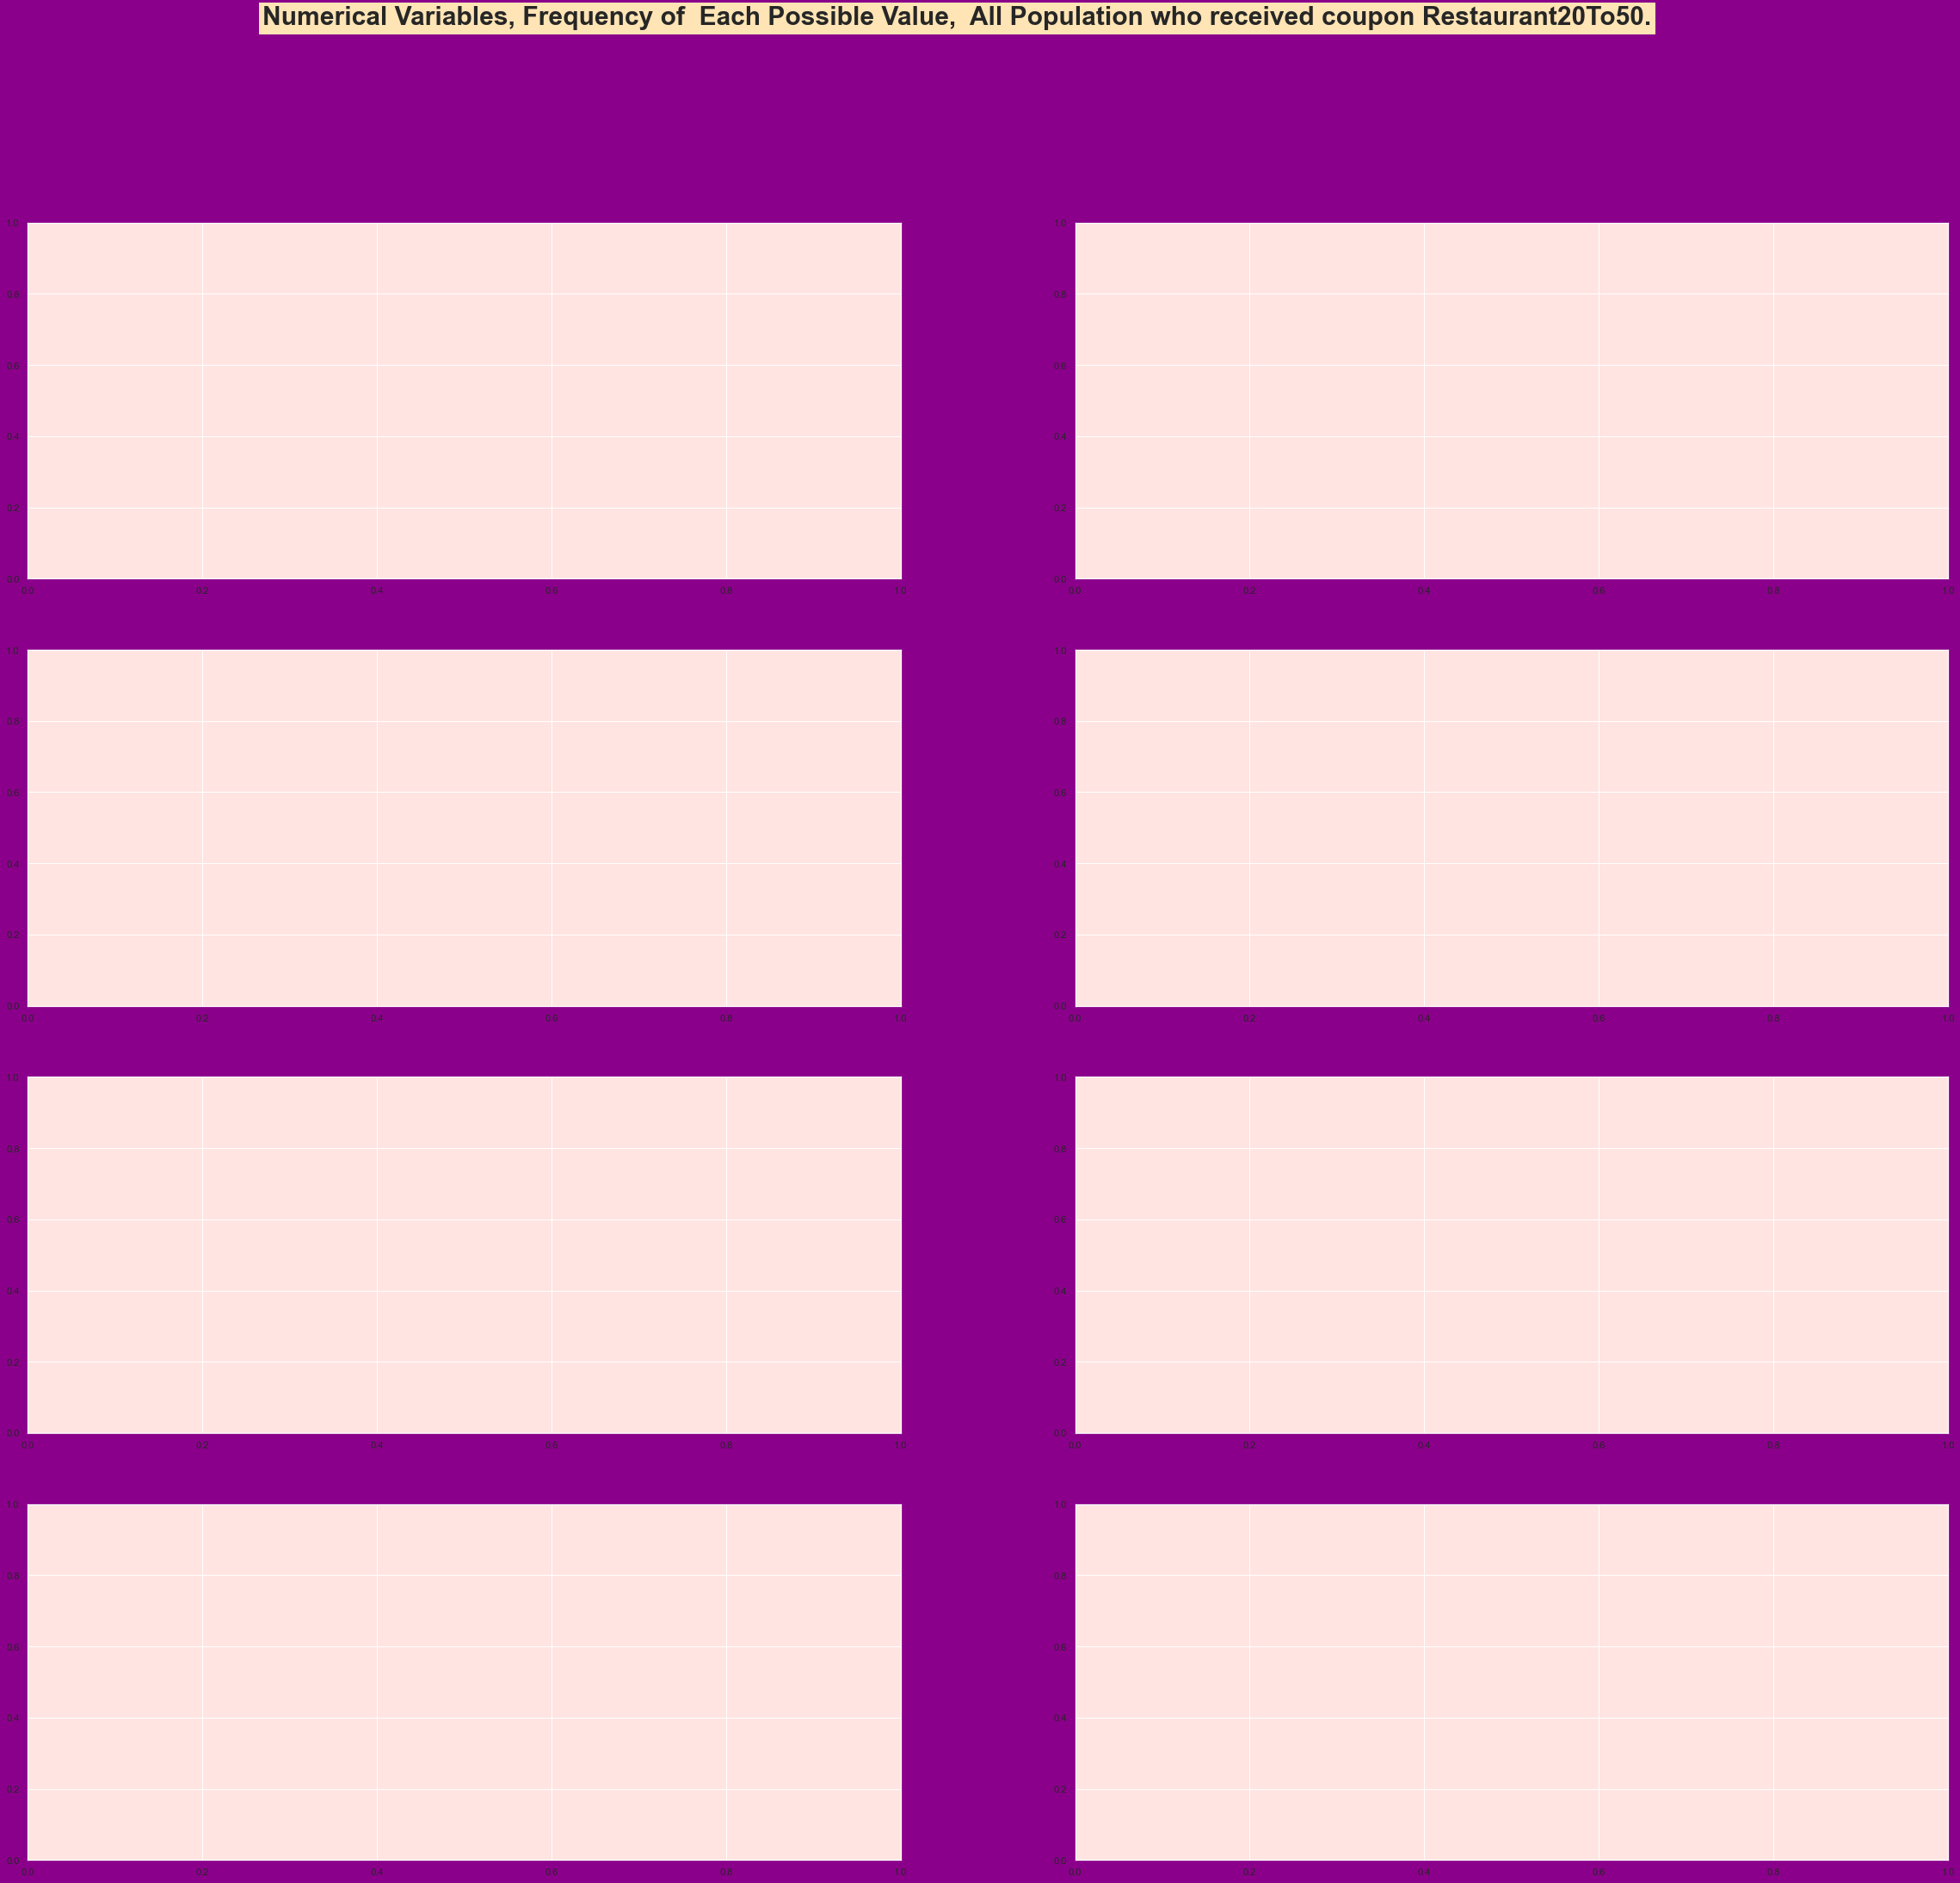

In [386]:
va_nb_rows=4
va_nb_cols=2
va_li_series_val_counts=li_s_freq_num_vars_all
va_li_subtitle=li_cols_num
va_subtitle="Numerical Variables, Frequency of  Each Possible Value,  All Population who received coupon Restaurant20To50."
va_name_fig_png="Figures/fig_subplts_num_vars_all_pop_received_coup_expensive_resto.png"
va_fig_facecolor="darkmagenta" #color for the background of the entire plot
va_axes_facecolor='mistyrose'#color for the background of each subplot
va_palette="tab10"
va_color_title="darkblue" #colot for title letters
va_color_axis_text="moccasin"
va_color_background="thistle"  #color for each subplot  title  background
va_color_background_1="moccasin"#rosybrown" #color for suptitle background


fct_subplots_barplots_li_vars(\
v_nb_rows=va_nb_rows,\
v_nb_cols=va_nb_cols,\
v_li_series_val_counts=va_li_series_val_counts,\
v_li_subtitle=va_li_subtitle,\
v_subtitle=va_subtitle,\
v_name_fig_png=va_name_fig_png,\
v_fig_facecolor=va_fig_facecolor,\
v_axes_facecolor=va_axes_facecolor,v_palette=va_palette,\
v_color_title=va_color_title,\
v_color_axis_text=va_color_axis_text,\
v_color_background=va_color_background,\
v_color_background_1=va_color_background_1)







#ii. object type variables

AttributeError: 'Rectangle' object has no property 'errorbar'

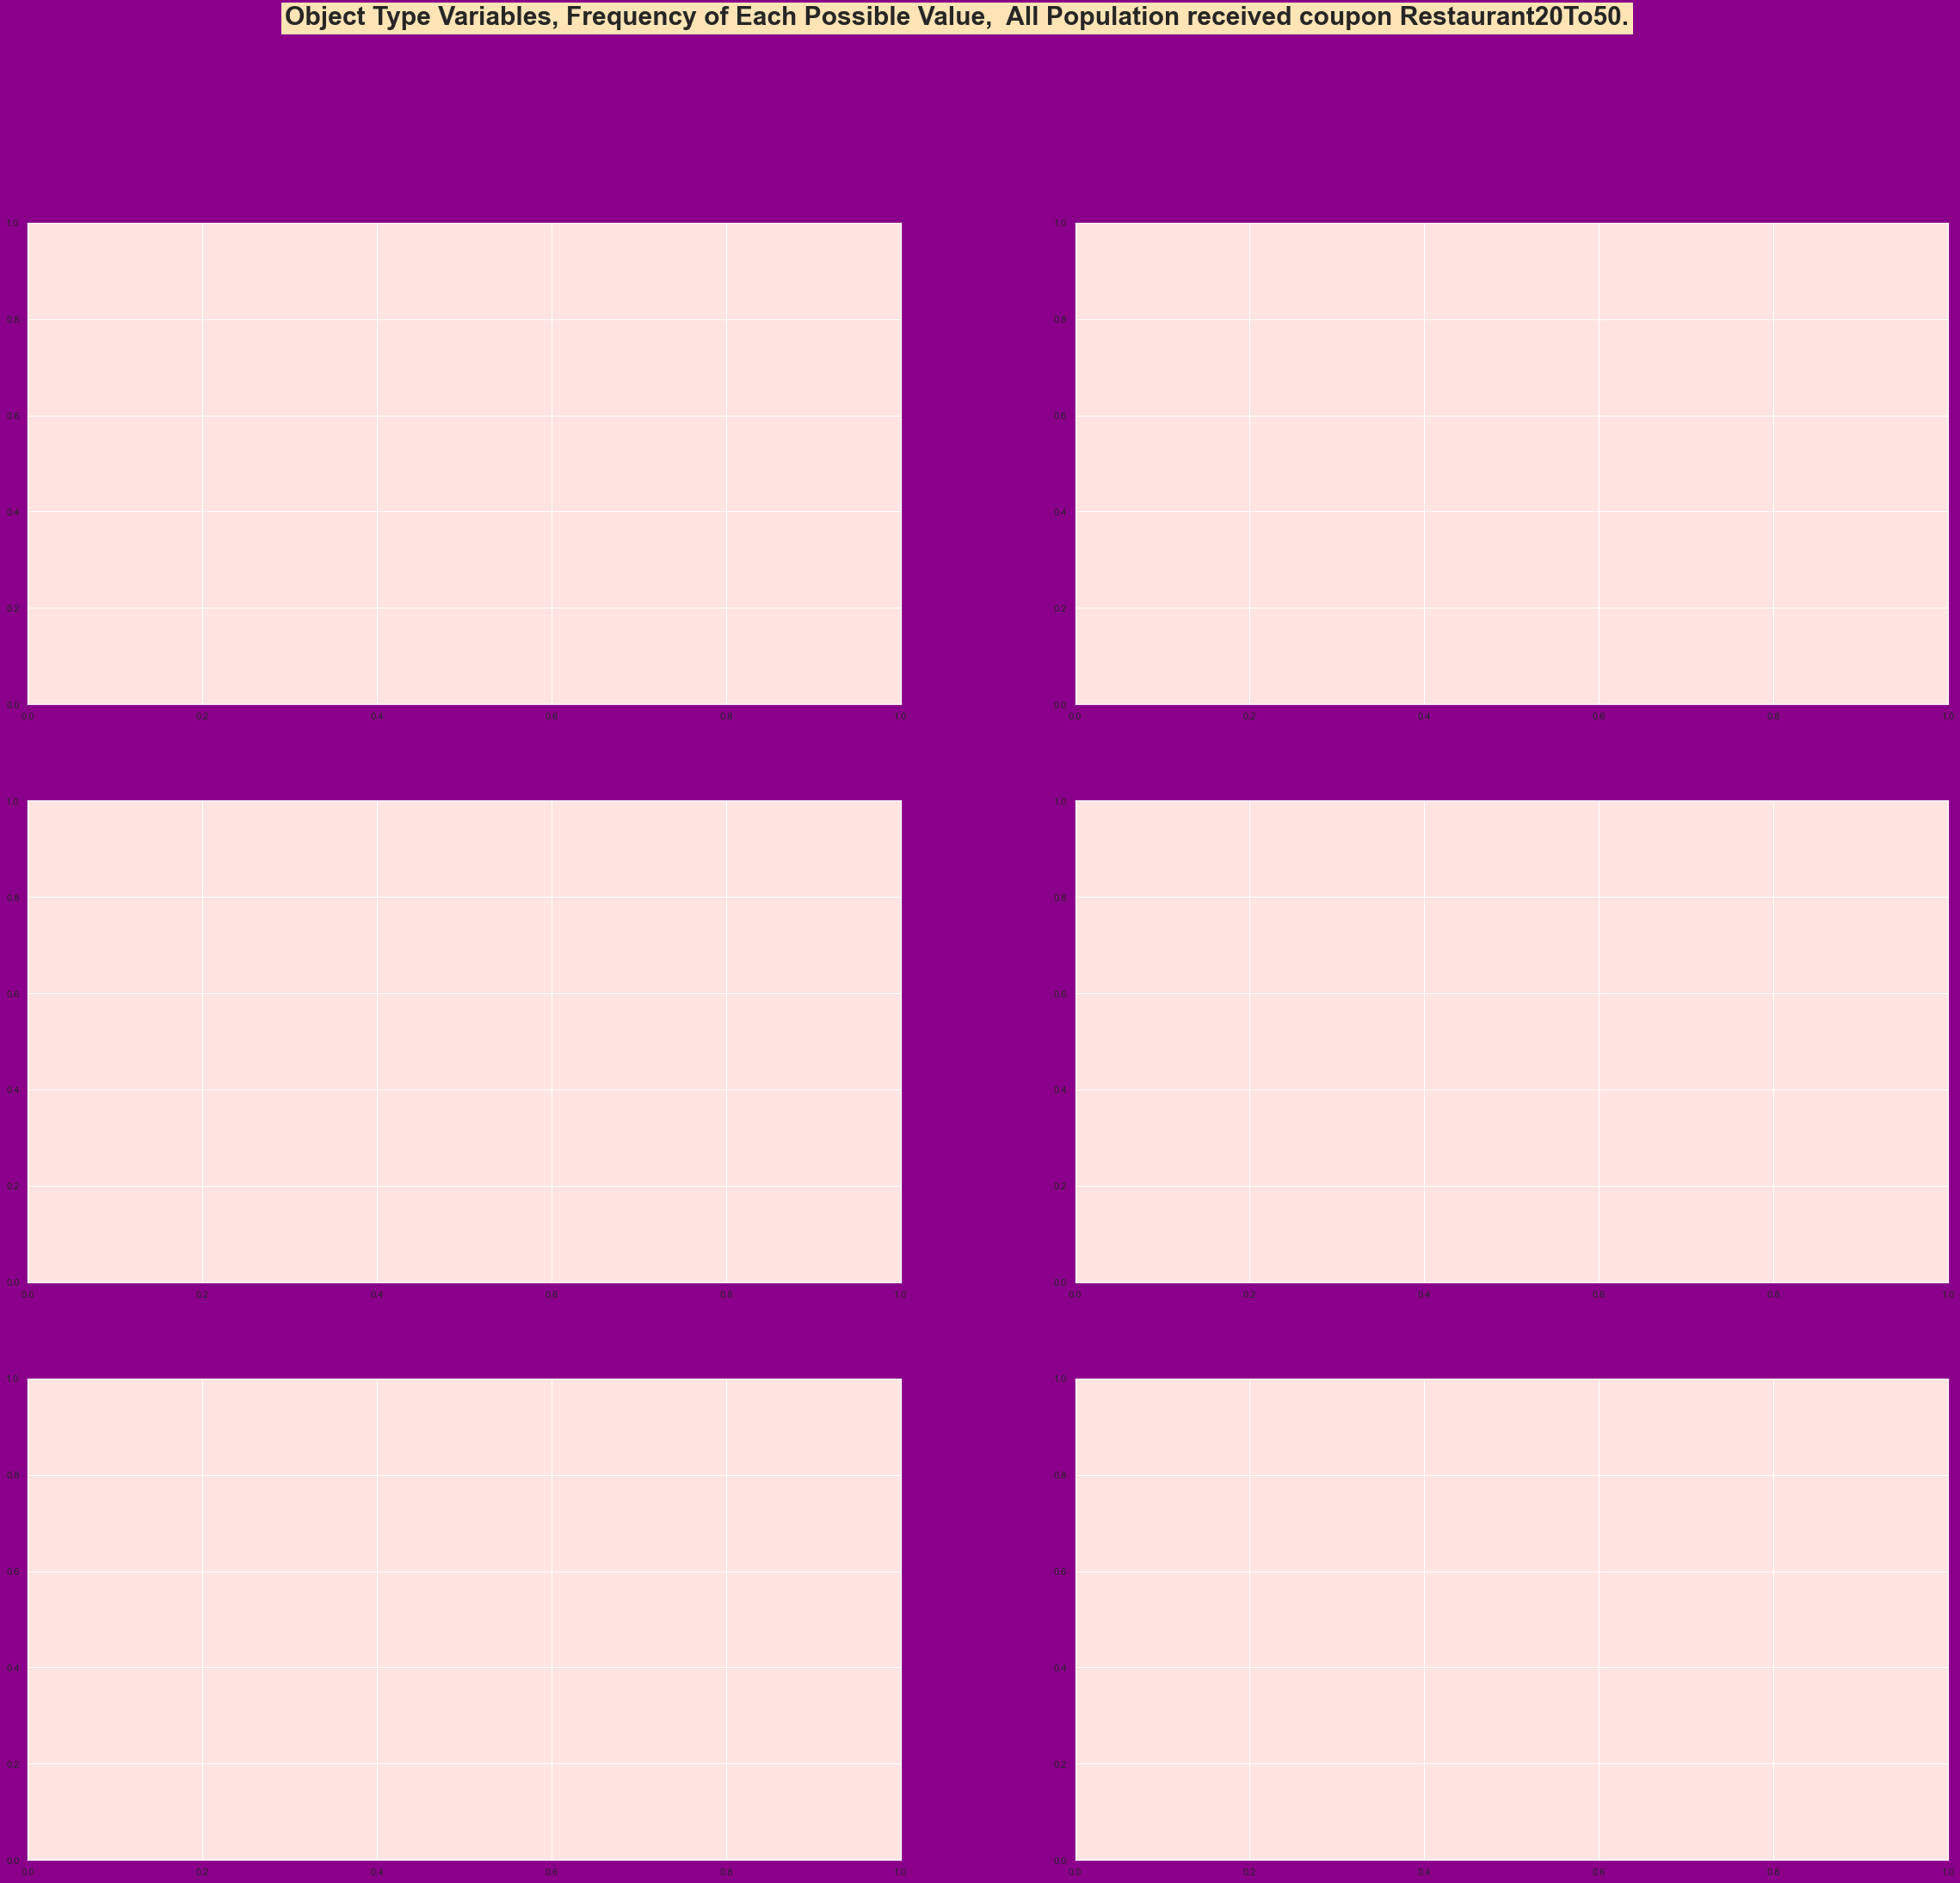

In [387]:
#x plot the first 6 variables of object type

va_nb_rows=3
va_li_series_val_counts=li_s_freq_obj_type_all[0:6]
va_li_subtitle=li_cols_obj_1[0:6]
va_subtitle="Object Type Variables, Frequency of Each Possible Value,  All Population received coupon Restaurant20To50."
va_name_fig_png="Figures/fig_subplts_obj_vars_coup_expensive_resto_all_pop_2_1.png"

va_fig_facecolor="darkmagenta" #color for the background of the entire plot
va_axes_facecolor='mistyrose'#color for the background of each subplot
va_palette="Paired"
va_color_title="darkblue" #colot for title letters
va_color_axis_text="moccasin"
va_color_background="thistle"  #color for each subplot  title  background
va_color_background_1="moccasin"#rosybrown" #color for suptitle background


fct_subplots_barplots_li_vars(\
v_nb_rows=va_nb_rows,\
v_nb_cols=va_nb_cols,\
v_li_series_val_counts=va_li_series_val_counts,\
v_li_subtitle=va_li_subtitle,\
v_subtitle=va_subtitle,\
v_name_fig_png=va_name_fig_png,\
v_fig_facecolor=va_fig_facecolor,\
v_axes_facecolor=va_axes_facecolor,v_palette=va_palette,\
v_color_title=va_color_title,\
v_color_axis_text=va_color_axis_text,\
v_color_background=va_color_background,\
v_color_background_1=va_color_background_1)

#we plot the 6,7,8 th variables obj type
va_nb_rows=2
va_li_series_val_counts=li_s_freq_obj_type_all[6:9]
va_li_subtitle=li_cols_obj_1[6:9]
va_name_fig_png="Figures/fig_subplts_obj_vars_coup_expensive_resto_all_pop_2_2.png"


fct_subplots_barplots_li_vars(\
v_nb_rows=va_nb_rows,\
v_nb_cols=va_nb_cols,\
v_li_series_val_counts=va_li_series_val_counts,\
v_li_subtitle=va_li_subtitle,\
v_subtitle=va_subtitle,\
v_name_fig_png=va_name_fig_png,\
v_fig_facecolor=va_fig_facecolor,\
v_axes_facecolor=va_axes_facecolor,v_palette=va_palette,\
v_color_title=va_color_title,\
v_color_axis_text=va_color_axis_text,\
v_color_background=va_color_background,\
v_color_background_1=va_color_background_1)


#we plot les variables 9,10, separatively to  improve legibility
va_nb_cols=1
va_nb_rows_1=2
va_li_series_val_counts=li_s_freq_obj_type_all[9:11]
va_li_subtitle=li_cols_obj_1[9:11]
va_name_fig_png="Figures/fig_subplts_obj_vars_coup_expensive_resto_all_pop_2_3.png"


fct_subplots_barplots_li_vars_multiple_rows_one_column(\
v_nb_rows=va_nb_rows_1,\
v_li_series_val_counts=va_li_series_val_counts,\
v_li_subtitle=va_li_subtitle,\
v_subtitle=va_subtitle,\
v_name_fig_png=va_name_fig_png,\
v_fig_facecolor=va_fig_facecolor,\
v_axes_facecolor=va_axes_facecolor,\
v_palette=va_palette,\
v_color_title=va_color_title,\
v_color_axis_text=va_color_axis_text,\
v_color_background=va_color_background,\
v_color_background_1=va_color_background_1)


#on plot le reste

va_nb_cols=2
va_nb_rows=3
va_li_series_val_counts=li_s_freq_obj_type_all[12:17]
va_li_subtitle=li_cols_obj_1[12:17]
va_name_fig_png="Figures/fig_subplts_obj_vars_coup_expensive_resto_all_pop_2_4.png"


fct_subplots_barplots_li_vars(\
v_nb_rows=va_nb_rows,\
v_nb_cols=va_nb_cols,\
v_li_series_val_counts=va_li_series_val_counts,\
v_li_subtitle=va_li_subtitle,\
v_subtitle=va_subtitle,\
v_name_fig_png=va_name_fig_png,\
v_fig_facecolor=va_fig_facecolor,\
v_axes_facecolor=va_axes_facecolor,v_palette=va_palette,\
v_color_title=va_color_title,\
v_color_axis_text=va_color_axis_text,\
v_color_background=va_color_background,\
v_color_background_1=va_color_background_1)










#2. plots of the conditional probability, pop who accepted expensive resto coupons

##i. plot of the numerical variables (barplot)

AttributeError: 'Rectangle' object has no property 'errorbar'

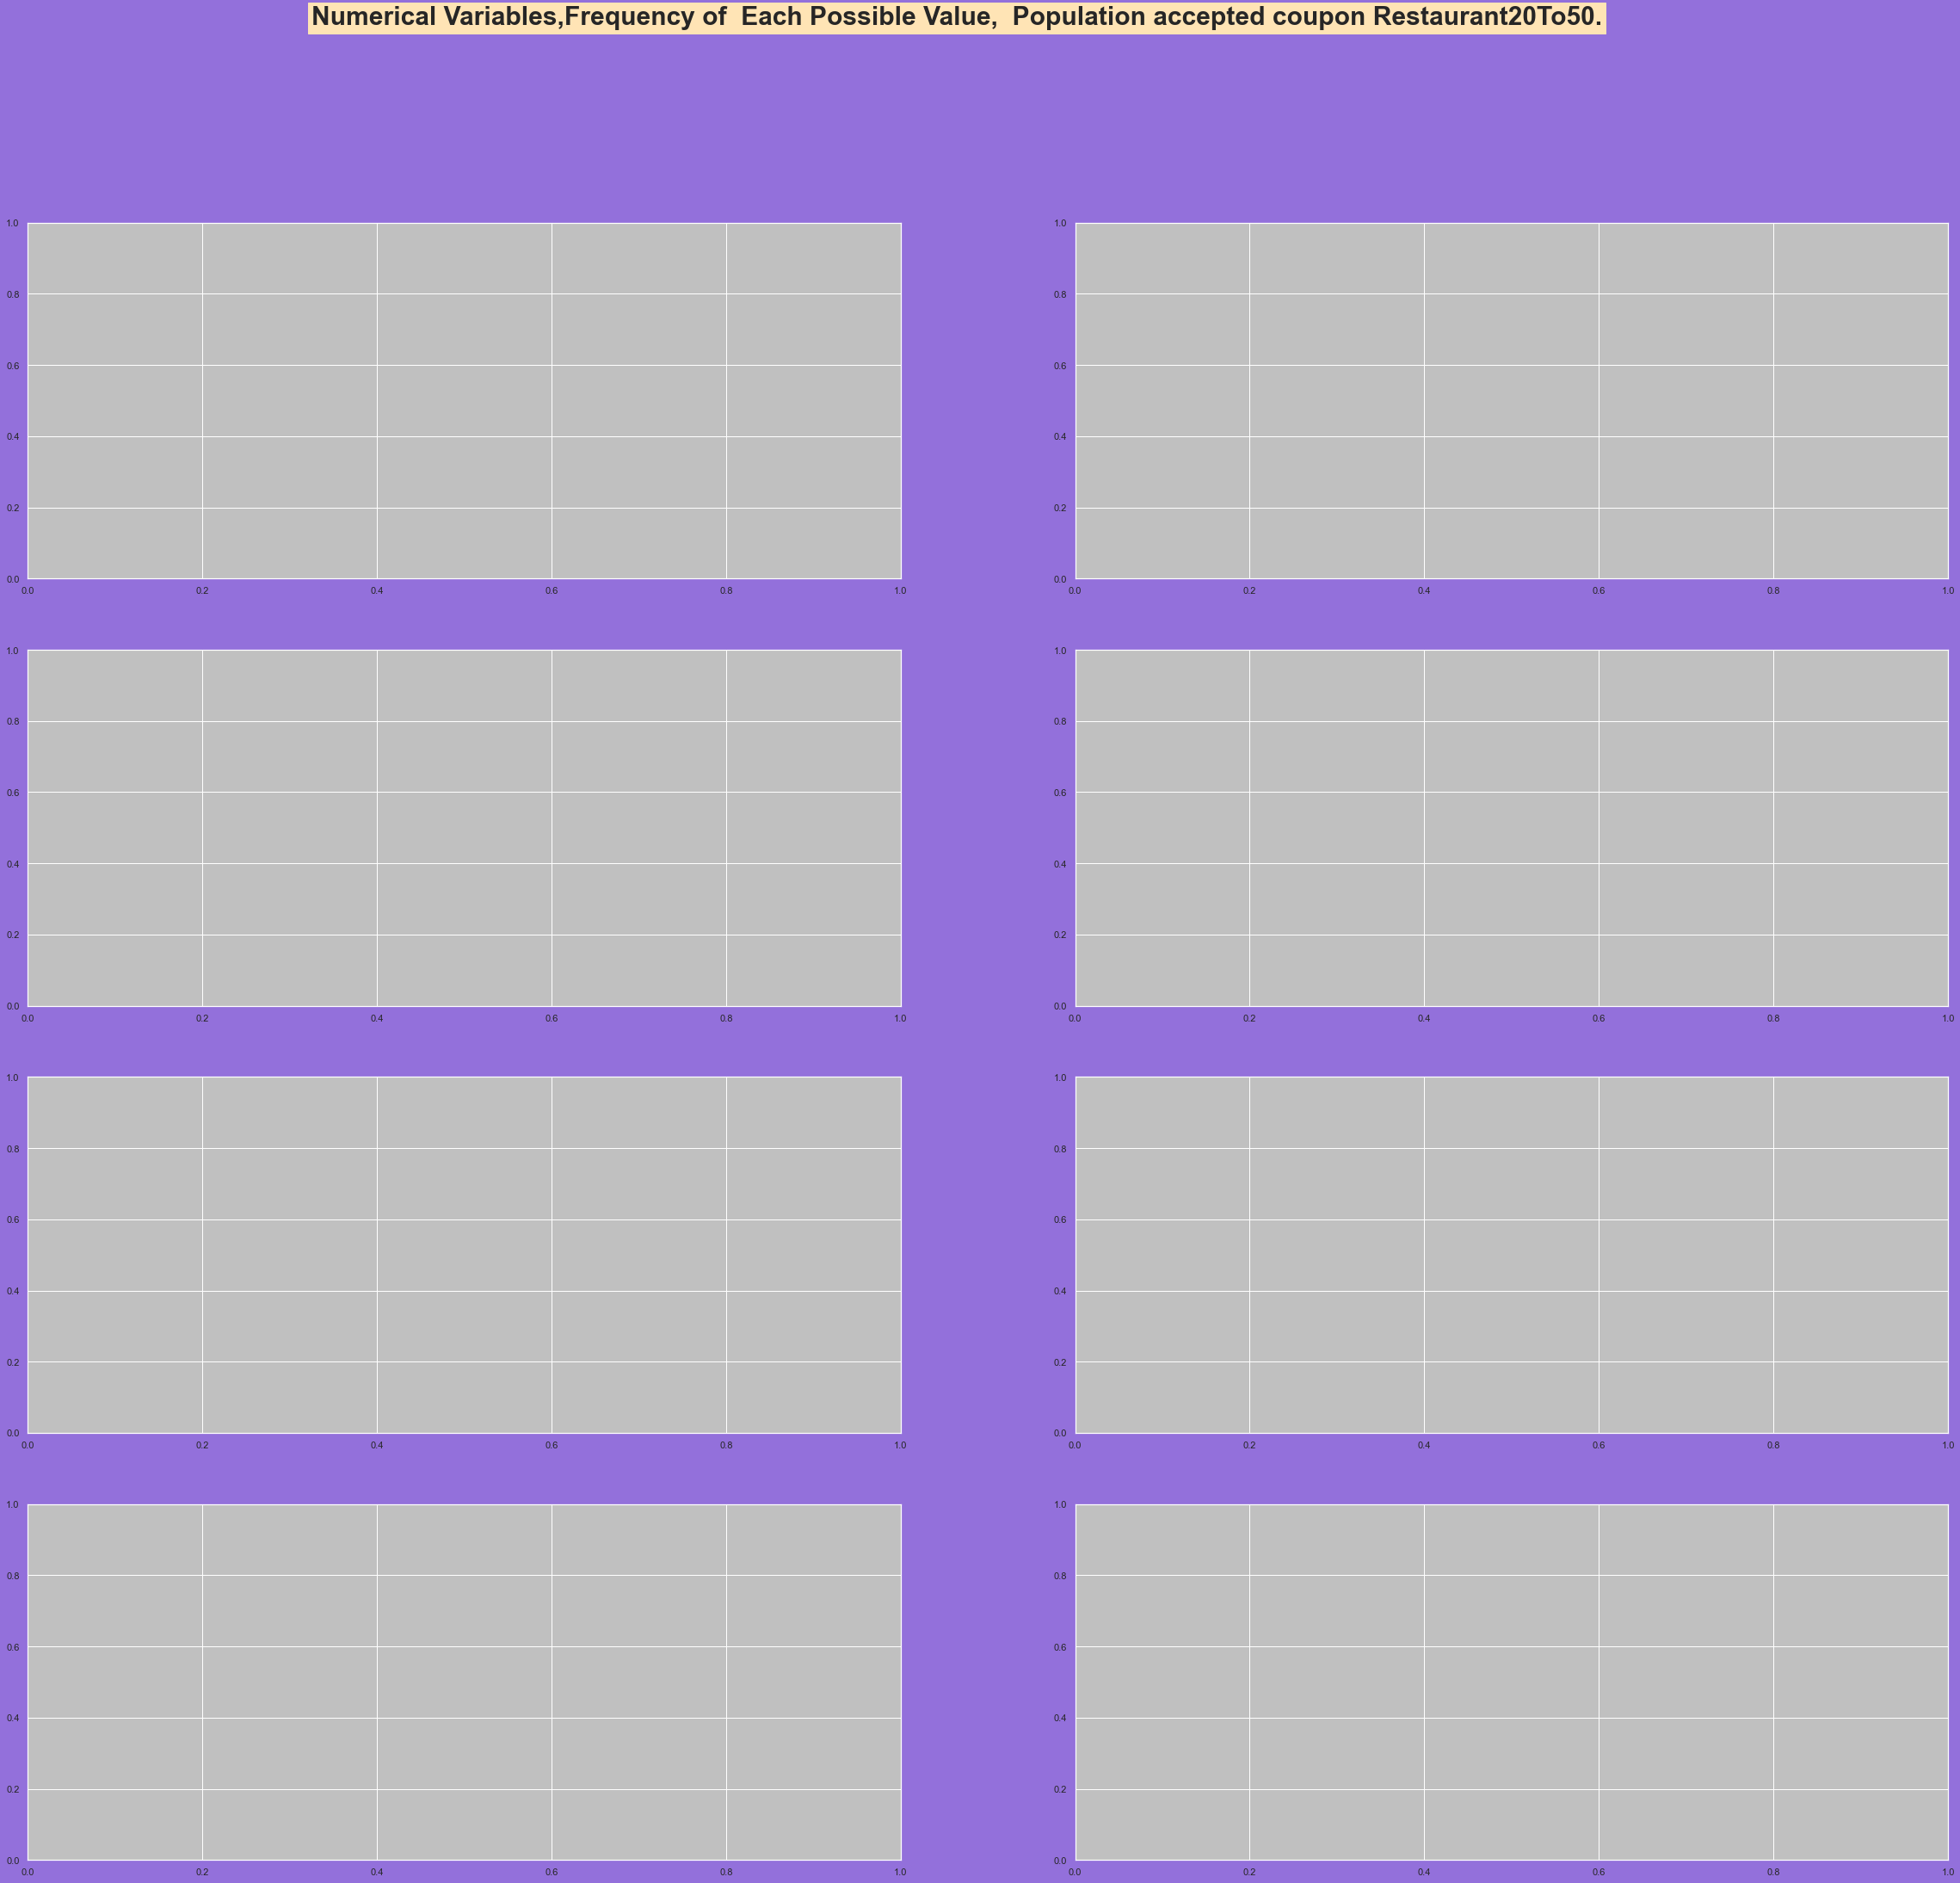

In [388]:
va_nb_rows=4
va_nb_cols=2
va_li_series_val_counts=li_s_freq_num_vars_ac
va_li_subtitle=li_cols_num
va_subtitle="Numerical Variables,Frequency of  Each Possible Value,  Population accepted coupon Restaurant20To50."
va_name_fig_png="Figures/fig_subplts_num_vars_coup_expensive_resto_accepted.png"

va_fig_facecolor="mediumpurple" #color for the background of the entire plot
va_axes_facecolor='silver'#color for the background of each subplot
va_palette="magma"
va_color_title="darkblue" #colot for title letters
va_color_axis_text="gold"
va_color_background="thistle"  #color for each subplot  title  background
va_color_background_1="moccasin"#color for suptitle background




fct_subplots_barplots_li_vars(\
v_nb_rows=va_nb_rows,\
v_nb_cols=va_nb_cols,\
v_li_series_val_counts=va_li_series_val_counts,\
v_li_subtitle=va_li_subtitle,\
v_subtitle=va_subtitle,\
v_name_fig_png=va_name_fig_png,\
v_fig_facecolor=va_fig_facecolor,\
v_axes_facecolor=va_axes_facecolor,v_palette=va_palette,\
v_color_title=va_color_title,\
v_color_axis_text=va_color_axis_text,\
v_color_background=va_color_background,\
v_color_background_1=va_color_background_1)

#ii. plot of the object typed variables (barplot)

AttributeError: 'Rectangle' object has no property 'errorbar'

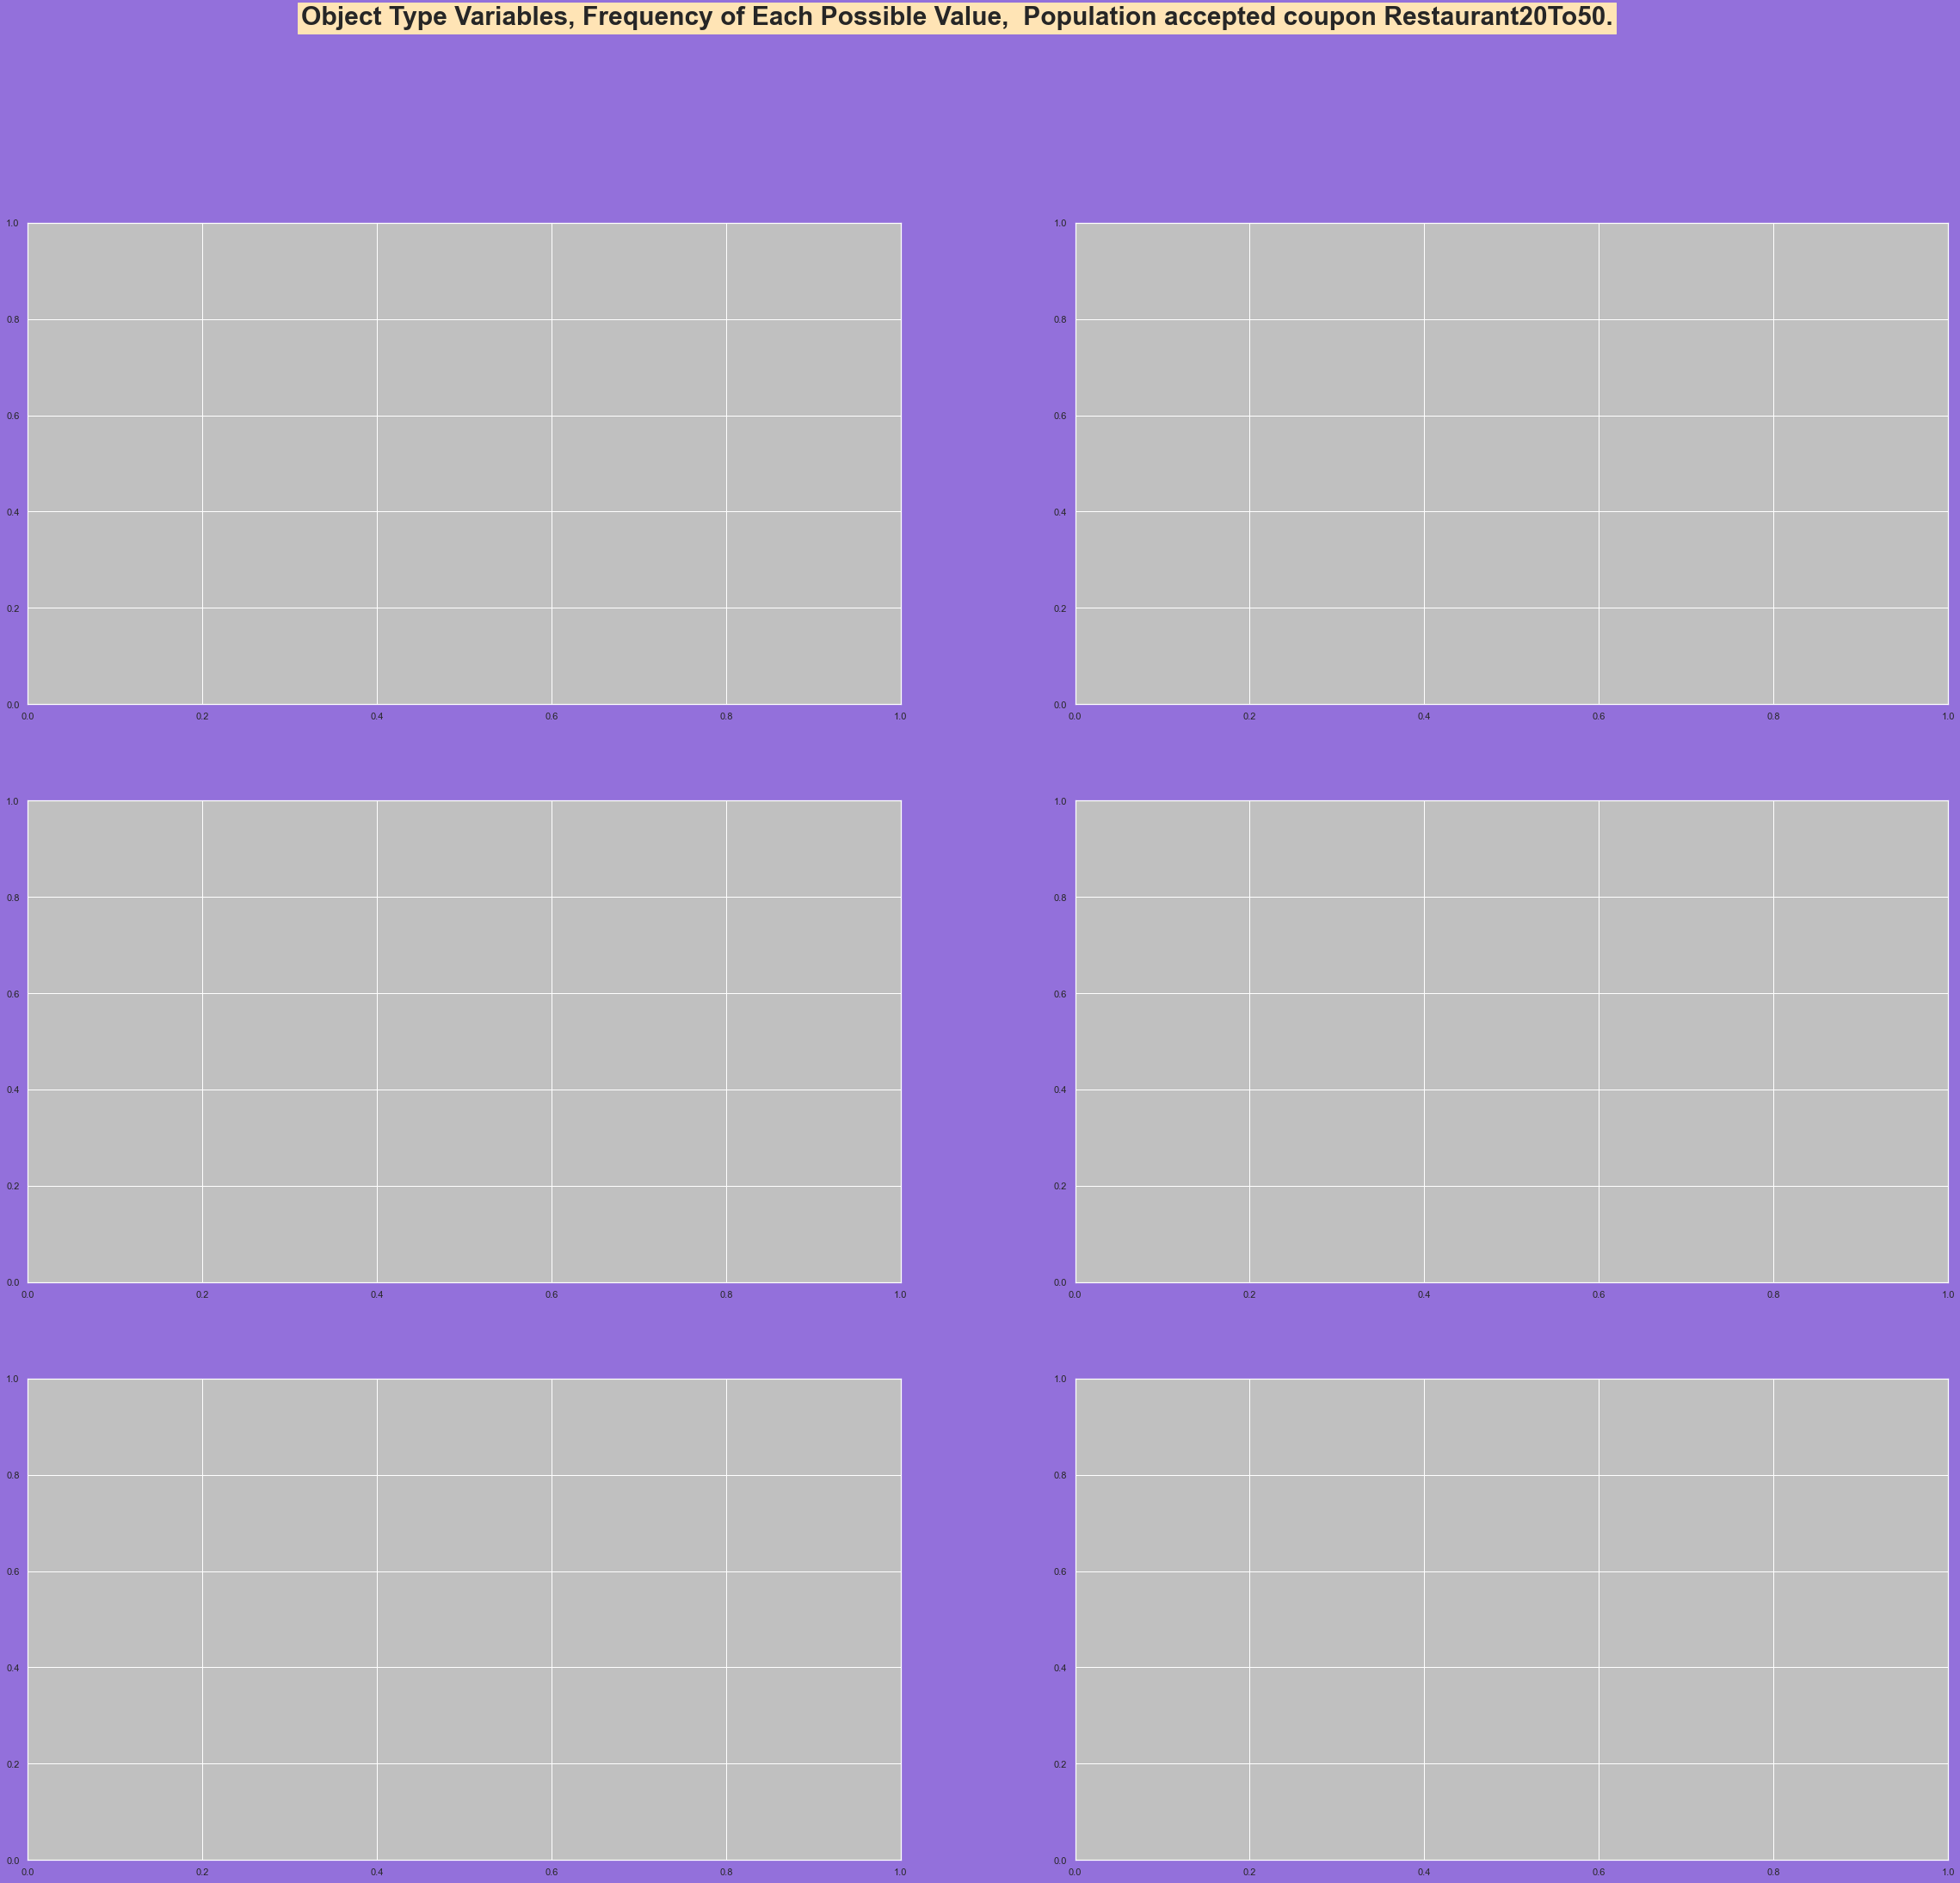

In [389]:
#plot variables from 0 to 6
va_nb_rows=3
va_li_series_val_counts=li_s_freq_obj_type_ac[0:6]
va_li_subtitle=li_cols_obj_1[0:6]
va_subtitle="Object Type Variables, Frequency of Each Possible Value,  Population accepted coupon Restaurant20To50."
va_name_fig_png="Figures/fig_subplts_obj_vars_coup_expensive_resto_accepted_2_1.png"

va_palette="rocket"



fct_subplots_barplots_li_vars(\
v_nb_rows=va_nb_rows,\
v_nb_cols=va_nb_cols,\
v_li_series_val_counts=va_li_series_val_counts,\
v_li_subtitle=va_li_subtitle,\
v_subtitle=va_subtitle,\
v_name_fig_png=va_name_fig_png,\
v_fig_facecolor=va_fig_facecolor,\
v_axes_facecolor=va_axes_facecolor,v_palette=va_palette,\
v_color_title=va_color_title,\
v_color_axis_text=va_color_axis_text,\
v_color_background=va_color_background,\
v_color_background_1=va_color_background_1)


#plot variables from 6 to 9
va_nb_rows=2
va_li_series_val_counts=li_s_freq_obj_type_ac[6:9]
va_li_subtitle=li_cols_obj_1[6:9]
va_name_fig_png="Figures/fig_subplts_obj_vars_coup_expensive_resto_accepted_2_2.png"
va_palette="mako"

fct_subplots_barplots_li_vars(\
v_nb_rows=va_nb_rows,\
v_nb_cols=va_nb_cols,\
v_li_series_val_counts=va_li_series_val_counts,\
v_li_subtitle=va_li_subtitle,\
v_subtitle=va_subtitle,\
v_name_fig_png=va_name_fig_png,\
v_fig_facecolor=va_fig_facecolor,\
v_axes_facecolor=va_axes_facecolor,v_palette=va_palette,\
v_color_title=va_color_title,\
v_color_axis_text=va_color_axis_text,\
v_color_background=va_color_background,\
v_color_background_1=va_color_background_1)




#on doit ploter les variables 9,10, séparément trop de valeurs  probleme de visibilité

va_nb_cols=1
va_nb_rows_1=2
va_li_series_val_counts=li_s_freq_obj_type_ac[9:11]
va_li_subtitle=li_cols_obj_1[9:11]
va_name_fig_png="Figures/fig_subplts_obj_vars_coup_expensive_resto_accepted_2_3.png"
#li_s_vc_obj_type_vars[9]


fct_subplots_barplots_li_vars_multiple_rows_one_column(\
v_nb_rows=va_nb_rows_1,\
v_li_series_val_counts=va_li_series_val_counts,\
v_li_subtitle=va_li_subtitle,\
v_subtitle=va_subtitle,\
v_name_fig_png=va_name_fig_png,\
v_fig_facecolor=va_fig_facecolor,\
v_axes_facecolor=va_axes_facecolor,\
v_palette=va_palette,\
v_color_title=va_color_title,\
v_color_axis_text=va_color_axis_text,\
v_color_background=va_color_background,\
v_color_background_1=va_color_background_1)


#on plot le reste

va_nb_cols=2
va_nb_rows=3
va_li_series_val_counts=li_s_freq_obj_type_ac[12:17]
va_li_subtitle=li_cols_obj_1[12:17]
va_name_fig_png="Figures/fig_subplts_obj_vars_coup_expensive_resto_accepted_2_4.png"
va_palette="cubehelix"

fct_subplots_barplots_li_vars(\
v_nb_rows=va_nb_rows,\
v_nb_cols=va_nb_cols,\
v_li_series_val_counts=va_li_series_val_counts,\
v_li_subtitle=va_li_subtitle,\
v_subtitle=va_subtitle,\
v_name_fig_png=va_name_fig_png,\
v_fig_facecolor=va_fig_facecolor,\
v_axes_facecolor=va_axes_facecolor,v_palette=va_palette,\
v_color_title=va_color_title,\
v_color_axis_text=va_color_axis_text,\
v_color_background=va_color_background,\
v_color_background_1=va_color_background_1)

#2. plots of the conditional probability, pop who rejected expensive resto coupons

##i. plot of the numerical variables (barplot)

AttributeError: 'Rectangle' object has no property 'errorbar'

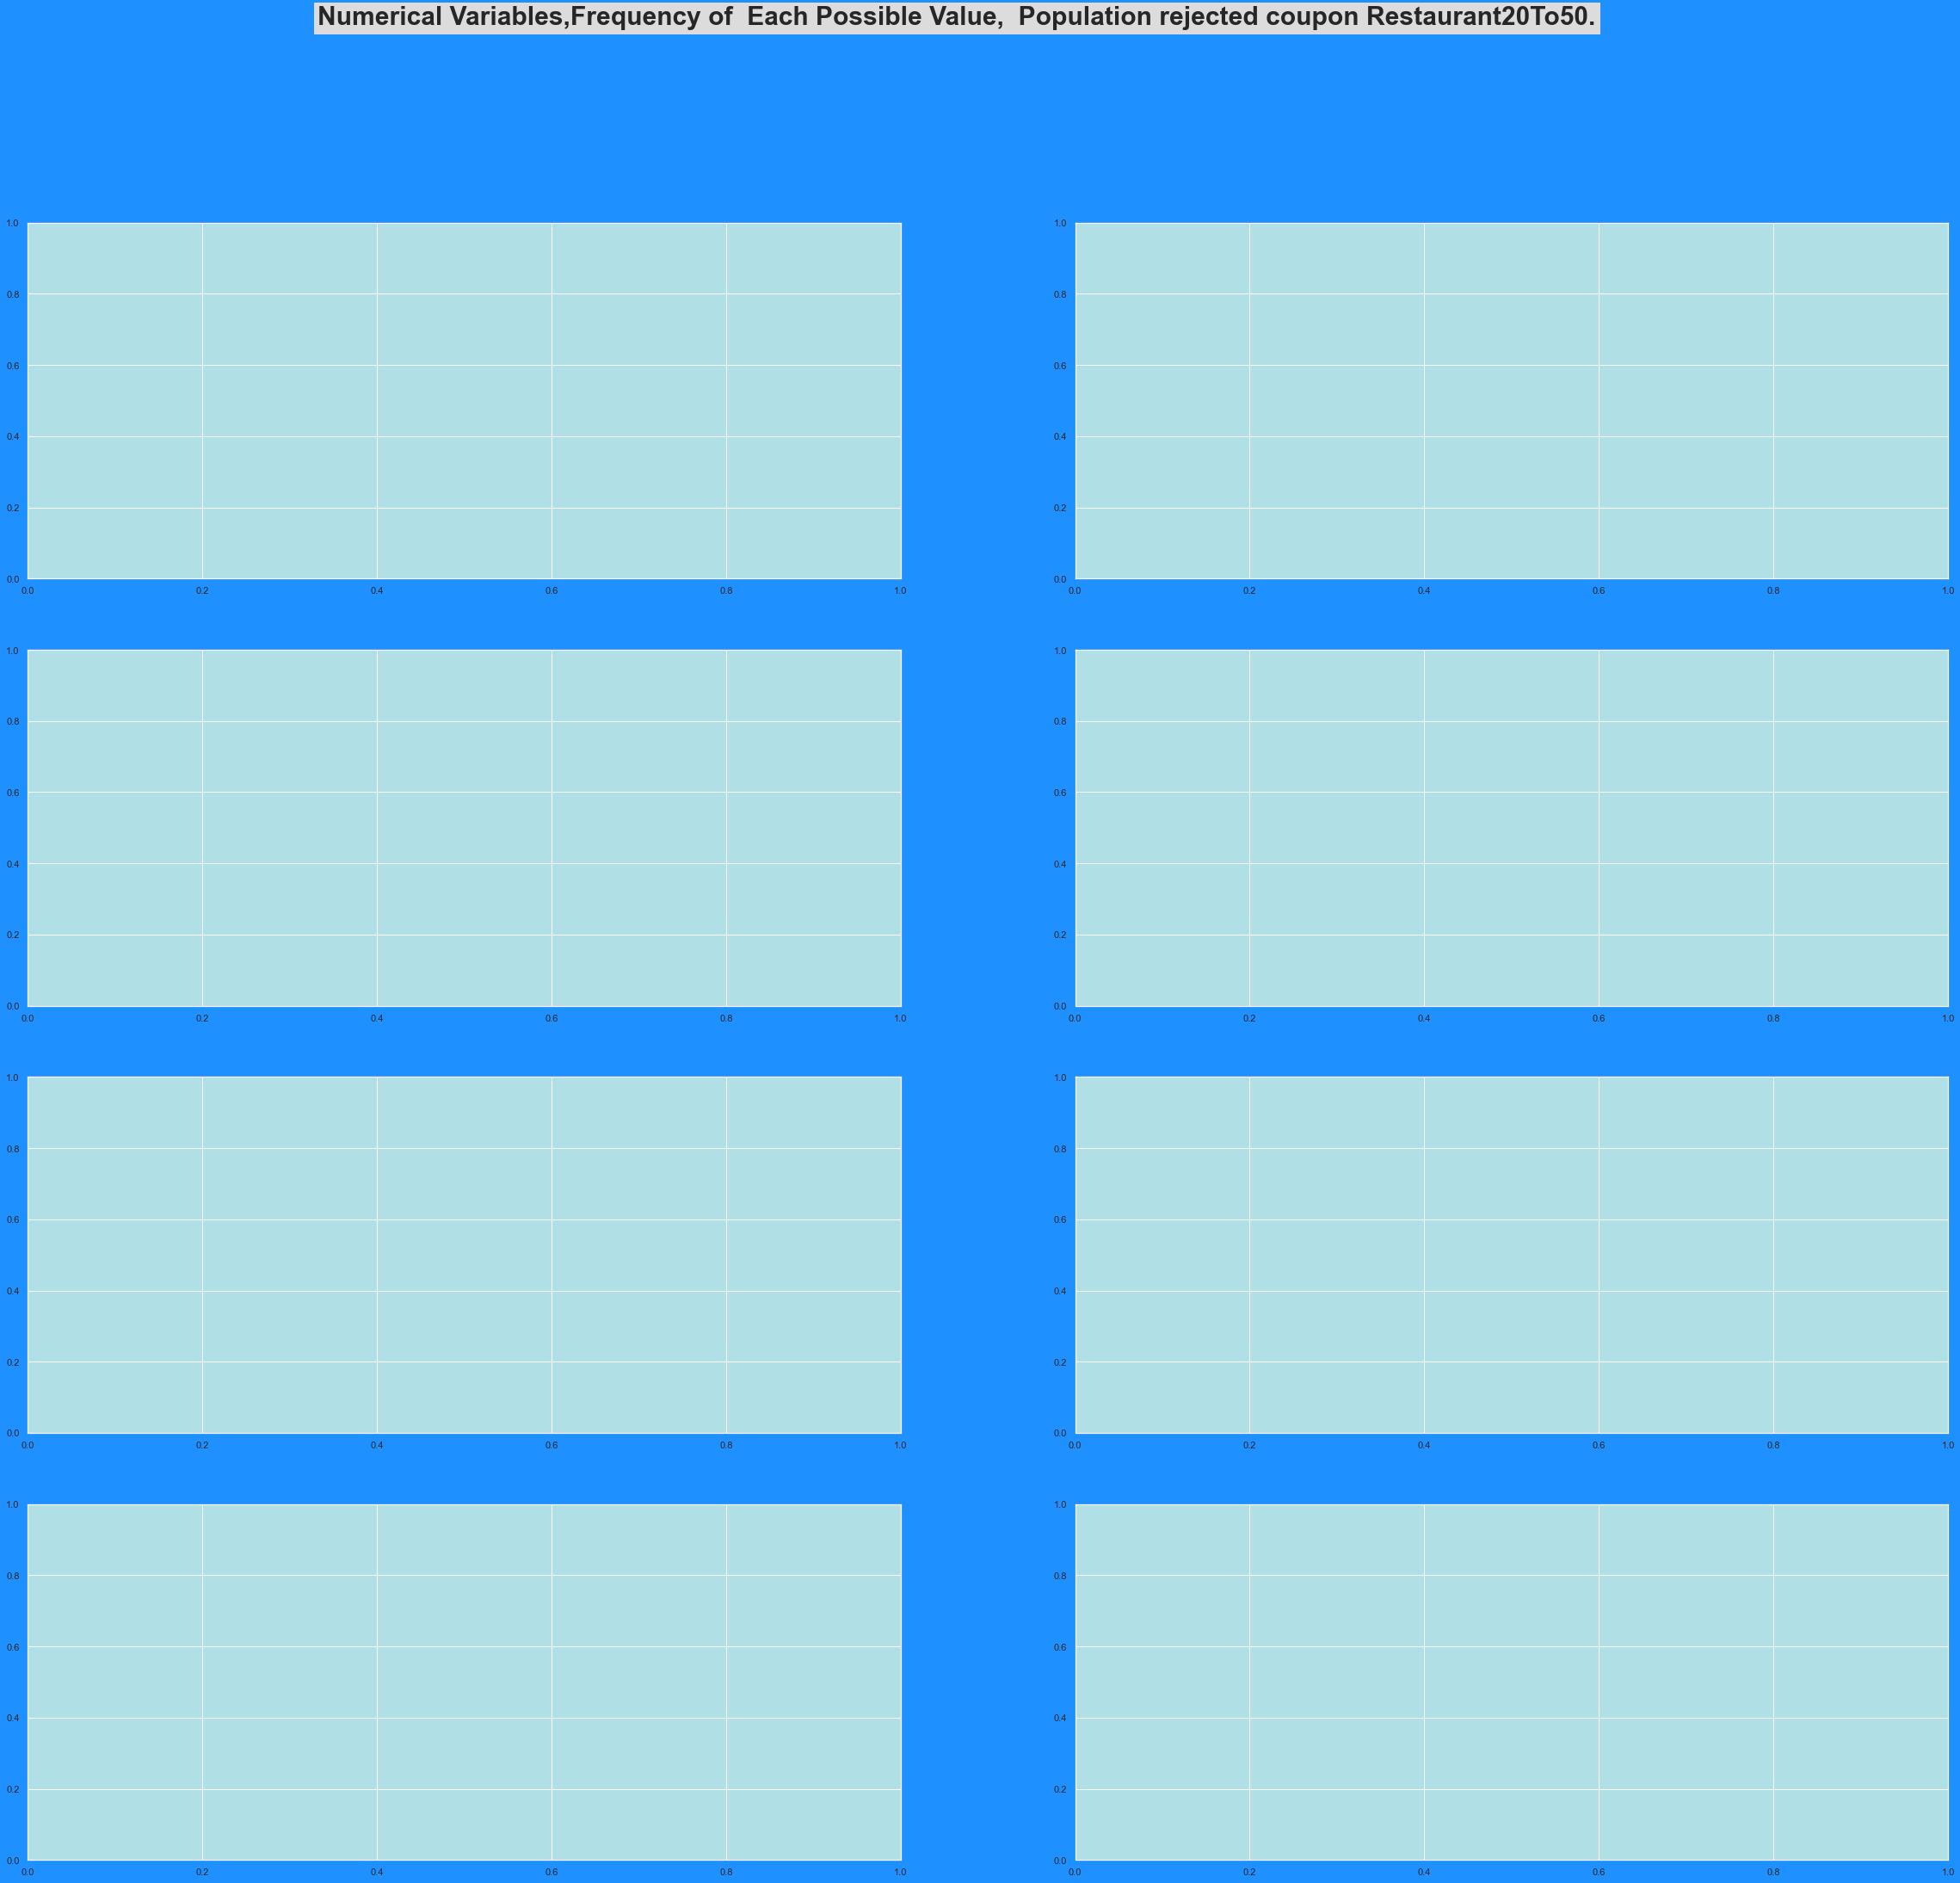

In [390]:
va_nb_rows=4
va_nb_cols=2
va_li_series_val_counts=li_s_freq_num_vars_rej
va_li_subtitle=li_cols_num
va_subtitle="Numerical Variables,Frequency of  Each Possible Value,  Population rejected coupon Restaurant20To50."
va_name_fig_png="Figures/fig_subplts_num_vars_coup_expensive_resto_rejected.png"


va_fig_facecolor="dodgerblue" #color for the background of the entire plot
va_axes_facecolor='powderblue'#color for the background of each subplot
va_palette="hls"
va_color_title="darkblue" #colot for title letters
va_color_axis_text="gold"
va_color_background="lightblue"  #color for each subplot  title  background
va_color_background_1="gainsboro"#rosybrown" #color for suptitle background



fct_subplots_barplots_li_vars(\
v_nb_rows=va_nb_rows,\
v_nb_cols=va_nb_cols,\
v_li_series_val_counts=va_li_series_val_counts,\
v_li_subtitle=va_li_subtitle,\
v_subtitle=va_subtitle,\
v_name_fig_png=va_name_fig_png,\
v_fig_facecolor=va_fig_facecolor,\
v_axes_facecolor=va_axes_facecolor,v_palette=va_palette,\
v_color_title=va_color_title,\
v_color_axis_text=va_color_axis_text,\
v_color_background=va_color_background,\
v_color_background_1=va_color_background_1)

#ii. plot of the object typed variables (barplot)

AttributeError: 'Rectangle' object has no property 'errorbar'

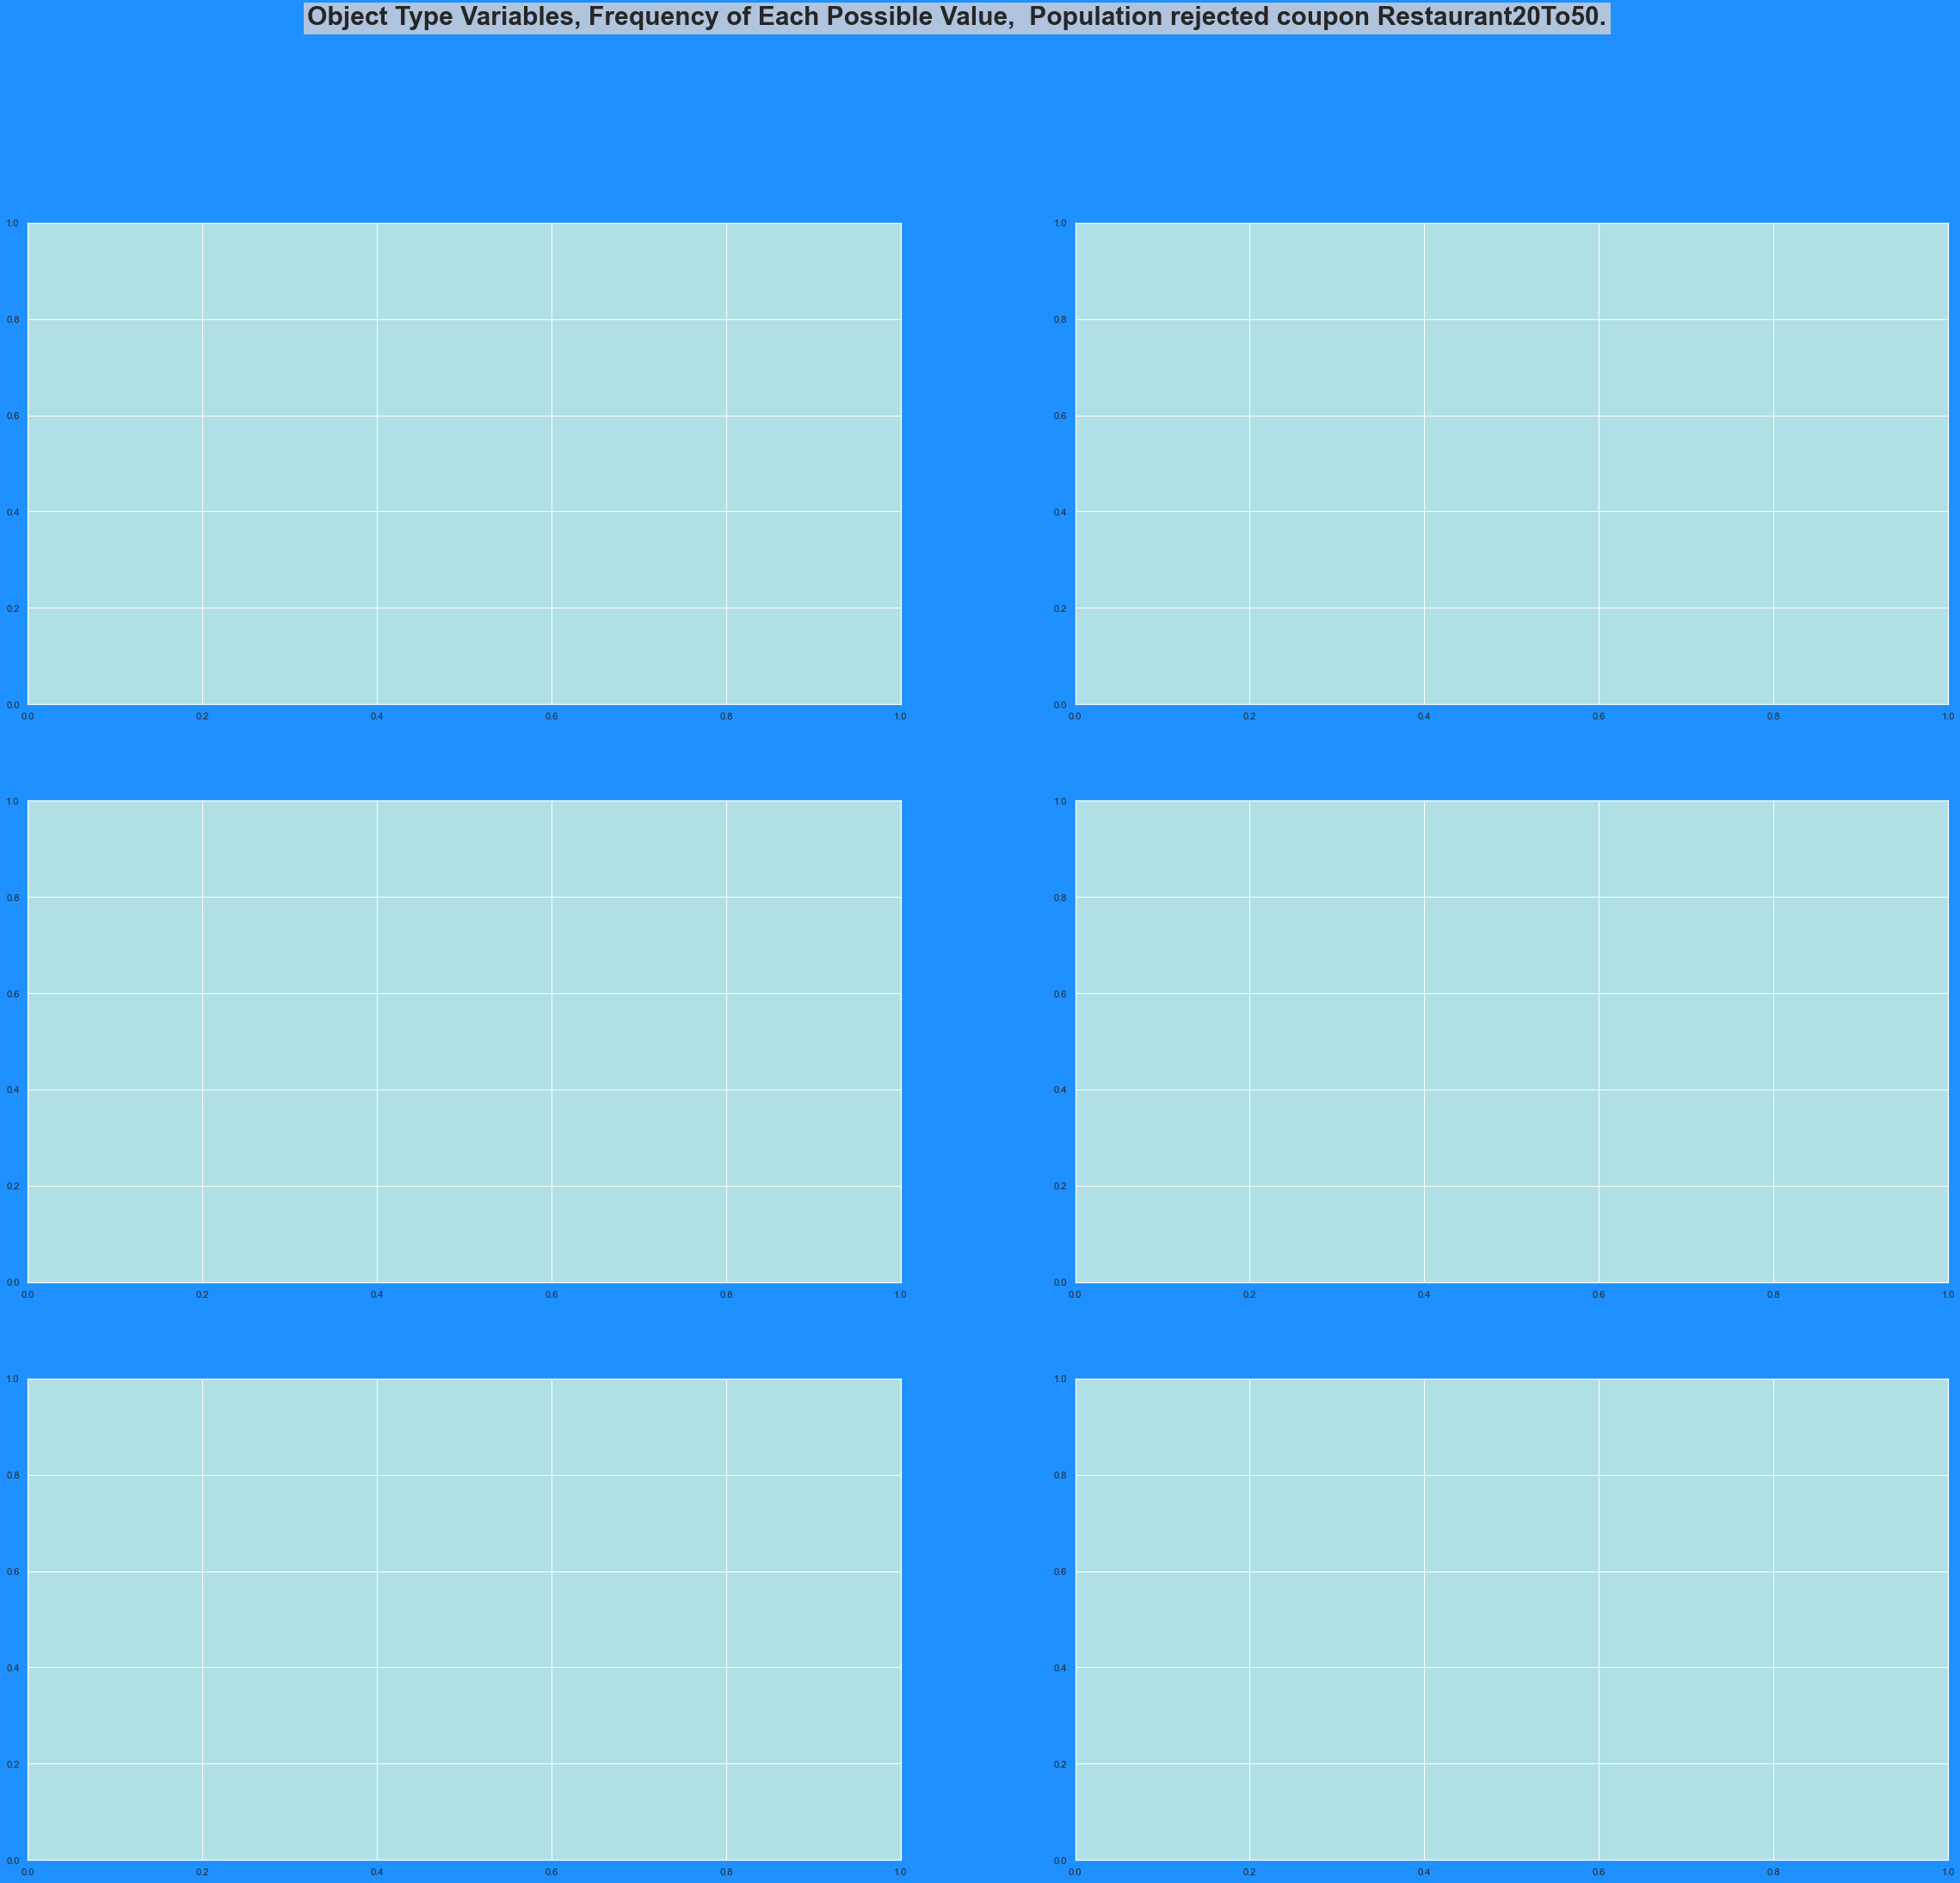

In [391]:
#plot variables from 0 to 6
va_nb_rows=3
va_li_series_val_counts=li_s_freq_obj_type_rej[0:6]
va_li_subtitle=li_cols_obj_1[0:6]
va_subtitle="Object Type Variables, Frequency of Each Possible Value,  Population rejected coupon Restaurant20To50."
va_name_fig_png="Figures/fig_subplts_obj_vars_coup_expensive_resto_rejected_2_1.png"
va_color_background_1="lightsteelblue"#rosybrown" #color for suptitle background

va_palette="rocket"



fct_subplots_barplots_li_vars(\
v_nb_rows=va_nb_rows,\
v_nb_cols=va_nb_cols,\
v_li_series_val_counts=va_li_series_val_counts,\
v_li_subtitle=va_li_subtitle,\
v_subtitle=va_subtitle,\
v_name_fig_png=va_name_fig_png,\
v_fig_facecolor=va_fig_facecolor,\
v_axes_facecolor=va_axes_facecolor,v_palette=va_palette,\
v_color_title=va_color_title,\
v_color_axis_text=va_color_axis_text,\
v_color_background=va_color_background,\
v_color_background_1=va_color_background_1)


#plot variables from 6 to 9
va_nb_rows=2
va_li_series_val_counts=li_s_freq_obj_type_rej[6:9]
va_li_subtitle=li_cols_obj_1[6:9]
va_name_fig_png="Figures/fig_subplts_obj_vars_coup_expensive_resto_rejected_2_2.png"



fct_subplots_barplots_li_vars(\
v_nb_rows=va_nb_rows,\
v_nb_cols=va_nb_cols,\
v_li_series_val_counts=va_li_series_val_counts,\
v_li_subtitle=va_li_subtitle,\
v_subtitle=va_subtitle,\
v_name_fig_png=va_name_fig_png,\
v_fig_facecolor=va_fig_facecolor,\
v_axes_facecolor=va_axes_facecolor,v_palette=va_palette,\
v_color_title=va_color_title,\
v_color_axis_text=va_color_axis_text,\
v_color_background=va_color_background,\
v_color_background_1=va_color_background_1)



#on doit ploter les variables 9,10, séparément trop de valeurs  probleme de visibilité

va_nb_cols=1
va_nb_rows_1=2
va_li_series_val_counts=li_s_freq_obj_type_rej[9:11]
va_li_subtitle=li_cols_obj_1[9:11]
va_name_fig_png="Figures/fig_subplts_obj_vars_coup_expensive_resto_rejected_2_3.png"
#li_s_vc_obj_type_vars[9]


fct_subplots_barplots_li_vars_multiple_rows_one_column(\
v_nb_rows=va_nb_rows_1,\
v_li_series_val_counts=va_li_series_val_counts,\
v_li_subtitle=va_li_subtitle,\
v_subtitle=va_subtitle,\
v_name_fig_png=va_name_fig_png,\
v_fig_facecolor=va_fig_facecolor,\
v_axes_facecolor=va_axes_facecolor,\
v_palette=va_palette,\
v_color_title=va_color_title,\
v_color_axis_text=va_color_axis_text,\
v_color_background=va_color_background,\
v_color_background_1=va_color_background_1)


#on plot le reste

va_nb_cols=2
va_nb_rows=3
va_li_series_val_counts=li_s_freq_obj_type_rej[12:17]
va_li_subtitle=li_cols_obj_1[12:17]
va_name_fig_png="Figures/fig_subplts_obj_vars_coup_expensive_resto_rejected_2_4.png"


fct_subplots_barplots_li_vars(\
v_nb_rows=va_nb_rows,\
v_nb_cols=va_nb_cols,\
v_li_series_val_counts=va_li_series_val_counts,\
v_li_subtitle=va_li_subtitle,\
v_subtitle=va_subtitle,\
v_name_fig_png=va_name_fig_png,\
v_fig_facecolor=va_fig_facecolor,\
v_axes_facecolor=va_axes_facecolor,v_palette=va_palette,\
v_color_title=va_color_title,\
v_color_axis_text=va_color_axis_text,\
v_color_background=va_color_background,\
v_color_background_1=va_color_background_1)